In [668]:
import pandas as pd
import numpy as np
import os
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

# Load Data

In [669]:
train_data, test_data = {}, {}
for i in range(1, 8):
    train_data["data{}".format(i)] = pd.read_csv("./data/data{}/train.csv".format(i), header=None)
    test_data["data{}".format(i)]  = pd.read_csv("./data/data{}/test.csv".format(i), header=None)

In [670]:
train_data['data1'].head(3)

0      1    2   3    4       5      6      7      8
0    NaN    0.0  0.0 NaN  2.5  1055.0  676.0   28.0  61.89
1    NaN  142.5  0.0 NaN  0.0   932.0  594.0  270.0  40.27
2  332.5  142.5  0.0 NaN  0.0   932.0  594.0  365.0  41.05

In [671]:
for data in train_data:
    df = train_data[data]
    print(data, ':', df.shape)

data1 : (765, 9)
data2 : (574, 9)
data3 : (371, 14)
data4 : (6064, 9)
data5 : (7077, 5)
data6 : (1187, 12)
data7 : (231, 7)


In [672]:
for data in train_data:
    df = train_data[data]
    display(pd.DataFrame({'unique values':df.nunique(), 'feature type':df.dtypes}))

unique values feature type
0            216      float64
1            141      float64
2            104      float64
3            151      float64
4             89      float64
5            204      float64
6            224      float64
7             14      float64
8            646      float64

unique values feature type
0             12      float64
1             12      float64
2              7      float64
3              4      float64
4              2      float64
5              4      float64
6              4      float64
7              6      float64
8            466      float64

unique values feature type
0             259      float64
1              23      float64
2              63      float64
3               2      float64
4              74      float64
5             239      float64
6             204      float64
7             226      float64
8               9      float64
9              51      float64
10             40      float64
11            189      float64
12            252      float64
13            190      float64

unique values feature type
0           4013      float64
1           3960      float64
2           3962      float64
3           3982      float64
4           4010      float64
5           3999      float64
6           3958      float64
7           3900      float64
8           4544      float64

unique values feature type
0           2302      float64
1            611      float64
2           2053      float64
3           3241      float64
4           4183      float64

unique values feature type
0              90      float64
1             127      float64
2              78      float64
3              76      float64
4             121      float64
5              52      float64
6             131      float64
7              98      float64
8              82      float64
9              81      float64
10             55      float64
11              6      float64

unique values feature type
0              5      float64
1             10      float64
2              8      float64
3             17      float64
4             10      float64
5             14      float64
6            204      float64

## 從欄位看，每行column的缺失值數量
column name = 第幾欄位

In [673]:
# Number of Missing Value
for data in train_data:
    df = train_data[data]
    count, percent = [], []
    for col in df:
        count.append(df[col].isnull().sum())
        percent.append( round(df[col].isnull().sum()/len(df[col])*100, 2) )
    display(pd.DataFrame({data:count, '%':percent}).transpose())

0       1      2       3       4       5       6       7    8
data1  234.00  220.00  218.0  225.00  219.00  239.00  249.00  237.00  0.0
%       30.59   28.76   28.5   29.41   28.63   31.24   32.55   30.98  0.0

0       1       2       3       4      5       6       7    8
data2  167.00  161.00  195.00  179.00  151.00  163.0  167.00  173.00  0.0
%       29.09   28.05   33.97   31.18   26.31   28.4   29.09   30.14  0.0

0       1       2       3      4       5       6       7       8   \
data3  110.00  124.00  103.00  103.00  105.0  118.00  124.00  122.00  118.00   
%       29.65   33.42   27.76   27.76   28.3   31.81   33.42   32.88   31.81   

          9       10      11      12   13  
data3  105.0  104.00  110.00  102.00  0.0  
%       28.3   28.03   29.65   27.49  0.0

0        1        2        3        4       5        6        7  \
data4  1755.00  1864.00  1834.00  1811.00  1764.00  1789.0  1850.00  1893.00   
%        28.94    30.74    30.24    29.86    29.09    29.5    30.51    31.22   

         8  
data4  0.0  
%      0.0

0        1        2        3    4
data5  2132.00  2149.00  2089.00  2114.00  0.0
%        30.13    30.37    29.52    29.87  0.0

0       1      2       3       4       5       6       7       8   \
data6  367.00  395.00  362.0  357.00  351.00  327.00  342.00  367.00  346.00   
%       30.92   33.28   30.5   30.08   29.57   27.55   28.81   30.92   29.15   

           9       10   11  
data6  366.00  321.00  0.0  
%       30.83   27.04  0.0

0      1      2      3      4      5    6
data7  68.00  62.00  74.00  63.00  78.00  68.00  0.0
%      29.44  26.84  32.03  27.27  33.77  29.44  0.0

## 從橫列看，每個 row 的缺失值數量
column name = 缺失值數量  
處理方案 : 選擇約 10% 缺少過多資料的 row 移除

In [674]:
# Number of Missing Value for each row
for data in train_data:
    df = train_data[data]
    count = [0 for _ in range(df.shape[1])]
    for row in range(df.shape[0]):
        target = df.iloc[row, :-1]
        missing_count = target.isnull().sum()
        count[missing_count] += 1  
        
    percent = [round(x/df.shape[0]*100, 2) for x in count]
    display(pd.DataFrame({data:count, '%':percent}).transpose())

0       1       2       3       4      5     6     7    8
data1  48.00  152.00  216.00  189.00  120.00  31.00  8.00  1.00  0.0
%       6.27   19.87   28.24   24.71   15.69   4.05  1.05  0.13  0.0

0       1       2       3      4     5     6    7    8
data2  38.00  106.00  187.00  139.00  69.00  27.0  8.00  0.0  0.0
%       6.62   18.47   32.58   24.22  12.02   4.7  1.39  0.0  0.0

0      1      2      3      4      5      6     7     8    9    10  \
data3  6.00  21.00  35.00  87.00  96.00  68.00  41.00  10.0  7.00  0.0  0.0   
%      1.62   5.66   9.43  23.45  25.88  18.33  11.05   2.7  1.89  0.0  0.0   

        11   12   13  
data3  0.0  0.0  0.0  
%      0.0  0.0  0.0

0        1        2        3       4       5      6     7     8
data4  359.00  1180.00  1791.00  1565.00  822.00  277.00  61.00  8.00  1.00
%        5.92    19.46    29.53    25.81   13.56    4.57   1.01  0.13  0.02

0        1        2       3      4
data5  1683.00  2960.00  1841.00  530.00  63.00
%        23.78    41.83    26.01    7.49   0.89

0       1       2       3       4       5      6     7     8     9   \
data6  27.00  100.00  242.00  320.00  245.00  171.00  63.00  13.0  3.00  2.00   
%       2.27    8.42   20.39   26.96   20.64   14.41   5.31   1.1  0.25  0.17   

        10    11  
data6  0.0  1.00  
%      0.0  0.08

0      1      2      3      4     5    6
data7  30.00  72.00  68.00  41.00  18.00  2.00  0.0
%      12.99  31.17  29.44  17.75   7.79  0.87  0.0

## 移除缺失值過多的 row (移除數量不超過 10%)

In [675]:
for data in train_data:
    df = train_data[data]
    # 計算每 row 的缺少值
    count = [0 for _ in range(df.shape[1])] 
    for row in range(df.shape[0]):
        missing_count = df.iloc[row, :-1].isnull().sum()
        count[missing_count] += 1  
        
    percent = [round(x/df.shape[0]*100, 2) for x in count]
    #display(pd.DataFrame({data:count, '%':percent}).transpose())
    percent_cum = np.cumsum(percent[::-1])[::-1] # reverse the list and do cumulation
    
    # remove task
    for num in range(df.shape[0]):
        if percent_cum[num] < 11: # 移除小於 11% 資料比例，決定移除缺少超過 `num` 個的 row
            for row in range(df.shape[0]):
                missing_count = df.iloc[row, :-1].isnull().sum()
                if missing_count >= num:
                    train_data[data] = train_data[data].drop(df.index[[row]])
            train_data[data] = train_data[data].reset_index(drop=True)
            break

In [676]:
# 移除後的資料 shape
for data in train_data:
    df = train_data[data]
    print(data, ':', df.shape)

data1 : (725, 9)
data2 : (539, 9)
data3 : (354, 14)
data4 : (5717, 9)
data5 : (6484, 5)
data6 : (1105, 12)
data7 : (211, 7)


# Original Data Plot

## Data 1

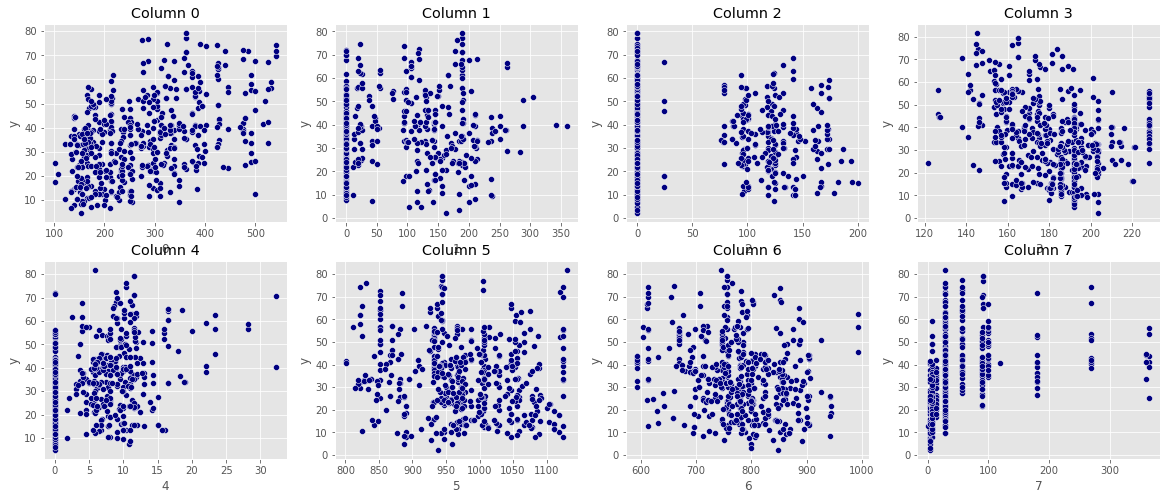

In [677]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_data['data1']
for i in range(df.shape[1]-1):
    ax1 = sns.scatterplot(x=df.iloc[:, i], y=df.iloc[:, -1], ax=axes[i//4][i%4], color="navy")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 2

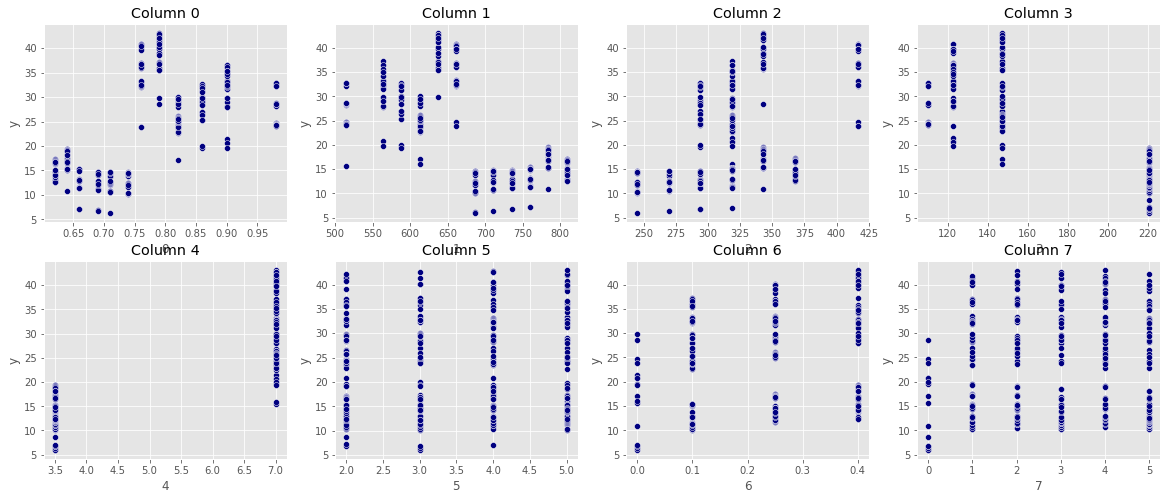

In [678]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_data['data2']
for i in range(df.shape[1]-1):
    ax1 = sns.scatterplot(x=df.iloc[:, i], y=df.iloc[:, -1], ax=axes[i//4][i%4], color="navy")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 3

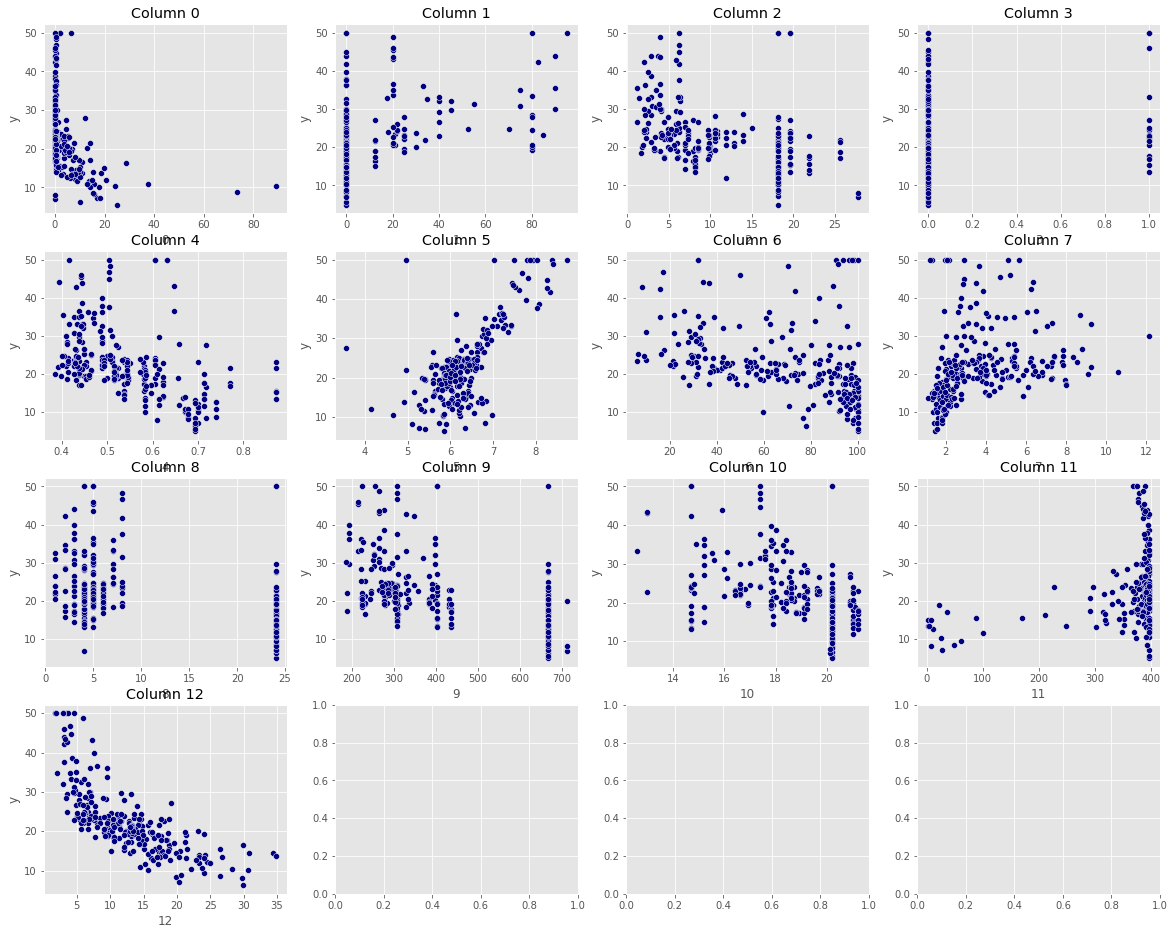

In [679]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 16))
df = train_data['data3']
for i in range(df.shape[1]-1):
    ax1 = sns.scatterplot(x=df.iloc[:, i], y=df.iloc[:, -1], ax=axes[i//4][i%4], color="navy")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 4

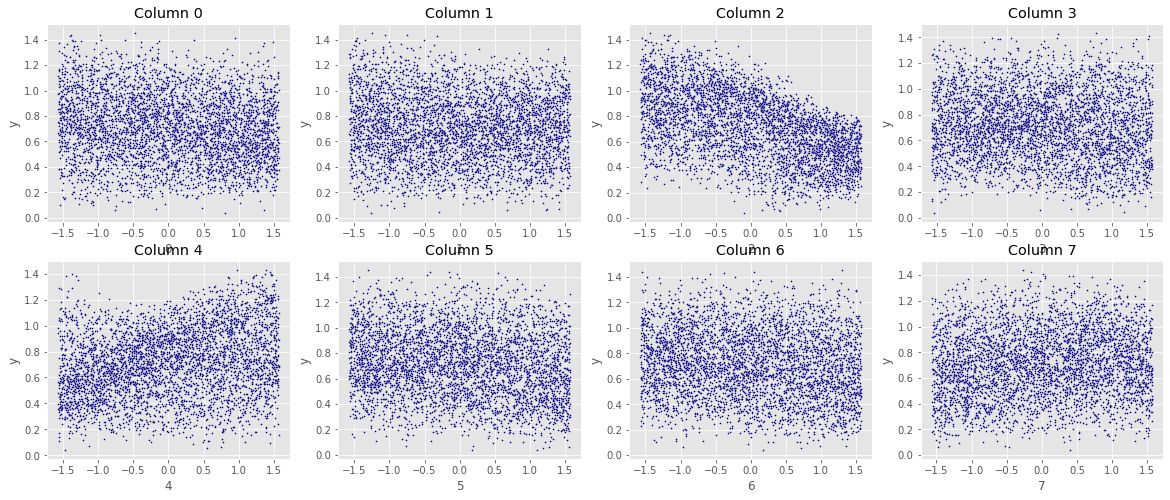

In [680]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_data['data4']
for i in range(df.shape[1]-1):
    ax1 = sns.scatterplot(x=df.iloc[:, i], y=df.iloc[:, -1], ax=axes[i//4][i%4], color="navy", s=3)
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 5

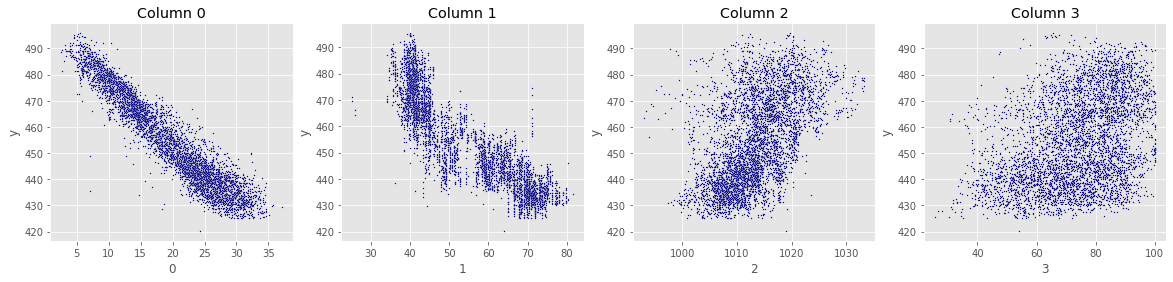

In [681]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 4))
df = train_data['data5']
for i in range(df.shape[1]-1):
    ax1 = sns.scatterplot(x=df.iloc[:, i], y=df.iloc[:, -1], ax=axes[i%4], color="navy", s=2)
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 6

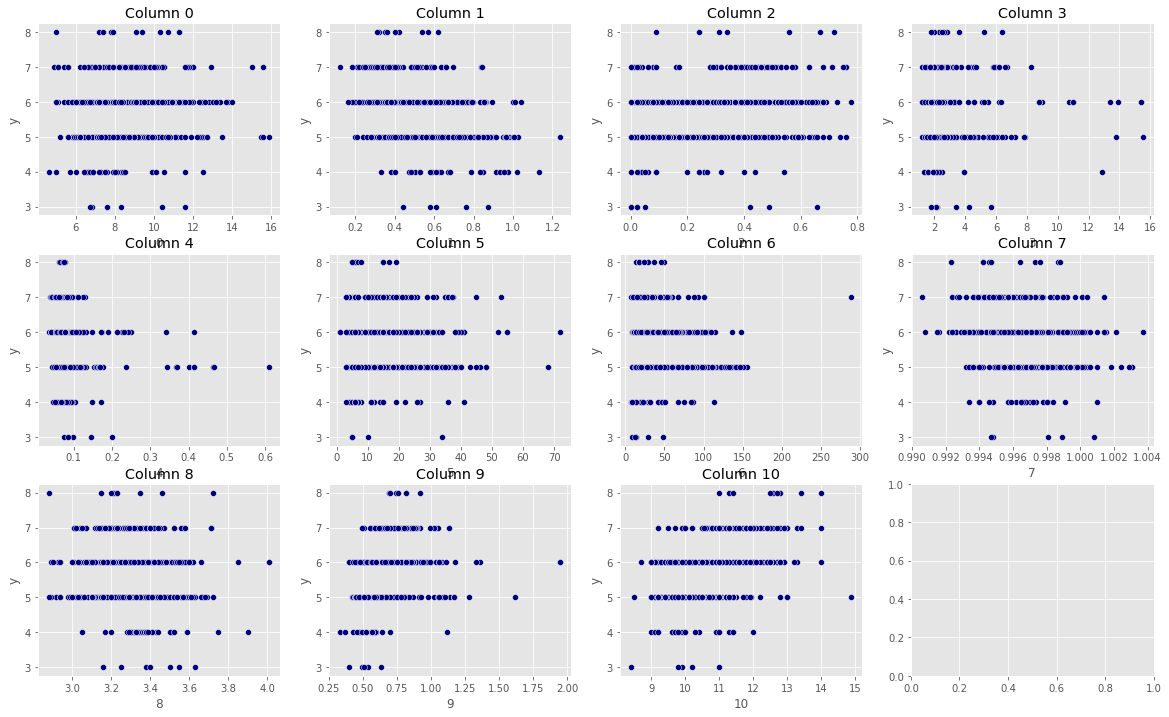

In [682]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20, 12))
df = train_data['data6']
for i in range(df.shape[1]-1):
    ax1 = sns.scatterplot(x=df.iloc[:, i], y=df.iloc[:, -1], ax=axes[i//4][i%4], color="navy")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 7

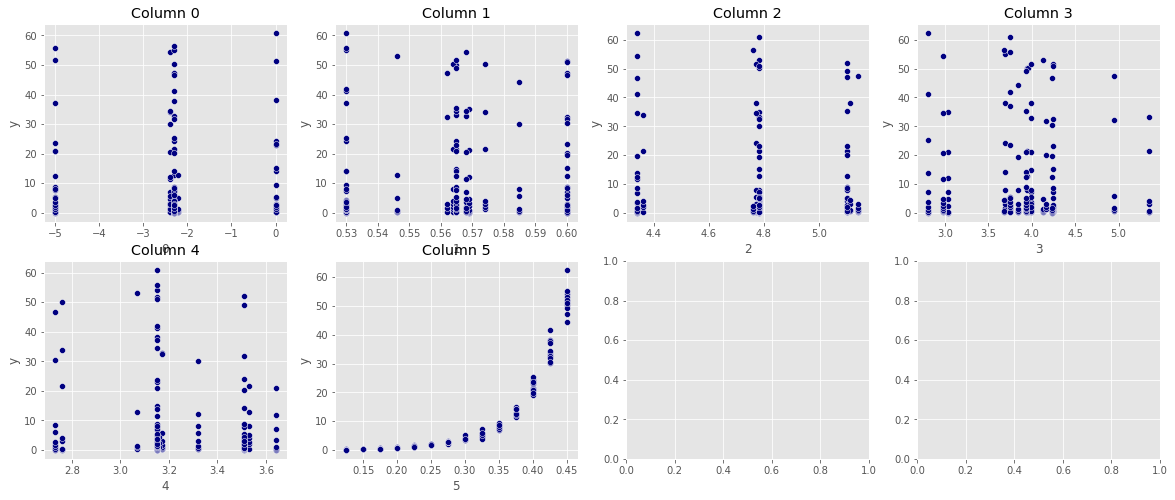

In [683]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_data['data7']
for i in range(df.shape[1]-1):
    ax1 = sns.scatterplot(x=df.iloc[:, i], y=df.iloc[:, -1], ax=axes[i//4][i%4], color="navy")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

# 資料處理

In [684]:
train_data_copy = train_data.copy()

## 轉換 nunique < 15 做 Label Encoding


In [685]:
for data in train_data:
    print(data)
    df = train_data[data]
    unique_num = df.nunique()
    for i in range(df.shape[1]):
        unique_item = df.iloc[:, i].unique()
        unique_item = sorted(unique_item[~np.isnan(unique_item)]) # 從 unique_item 移除 nan
        if unique_num[i] < 15:
            #df.iloc[:, i] = encoder.fit_transform(df.iloc[:, i])
            for j in range(unique_num[i]):
                to_replace = np.where(df.iloc[:, i]==unique_item[j])[0]
                train_data[data].loc[to_replace, i] = (j+1)

data1
data2
data3
data4
data5
data6
data7


# Fill The Missing Value -- Mean

In [686]:
from fancyimpute import SimpleFill
imputer_mean   = SimpleFill(fill_method='mean')

train_meanfill, test_meanfill = {}, {}
for i in range(1, 8):
    df_X = train_data["data{}".format(i)].iloc[:, :-1]
    df_y = train_data["data{}".format(i)].iloc[:, -1]
    df_impute = pd.DataFrame(imputer_mean.fit_transform(df_X))
    train_meanfill["data{}".format(i)] = pd.concat([df_impute, df_y], axis=1)
    
    df_X = test_data["data{}".format(i)].iloc[:, :-1]
    df_y = test_data["data{}".format(i)].iloc[:, -1]
    df_impute = pd.DataFrame(imputer_mean.fit_transform(df_X))
    test_meanfill["data{}".format(i)] = pd.concat([df_impute, df_y], axis=1)

## Data 1

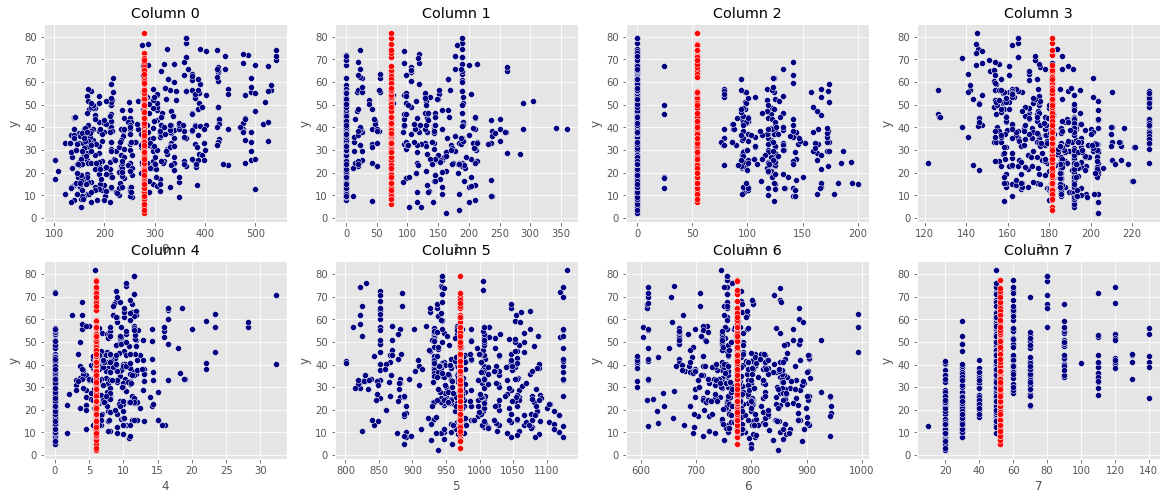

In [687]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_meanfill['data1']
df_na = train_data['data1'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 2

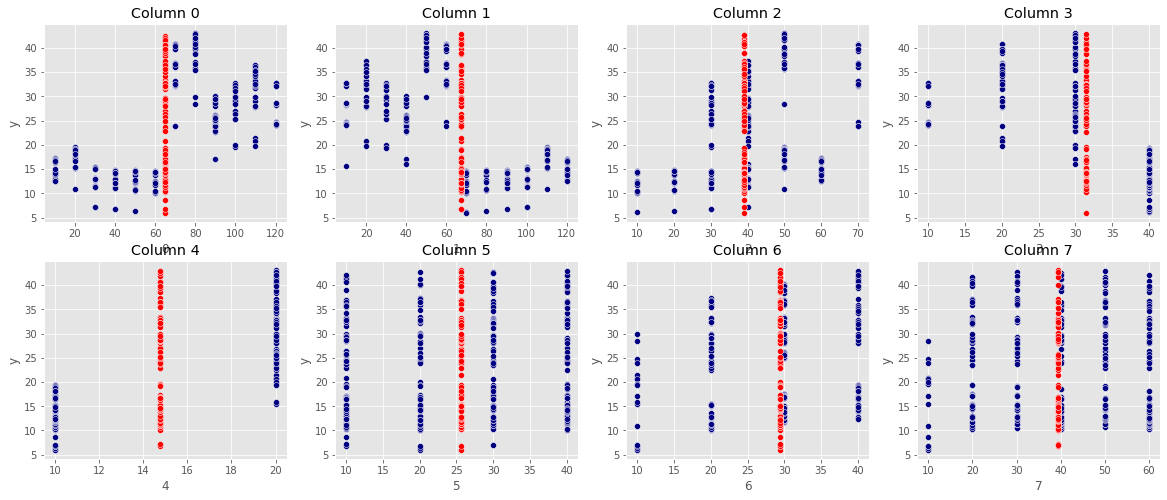

In [688]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_meanfill['data2']
df_na = train_data['data2'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 3

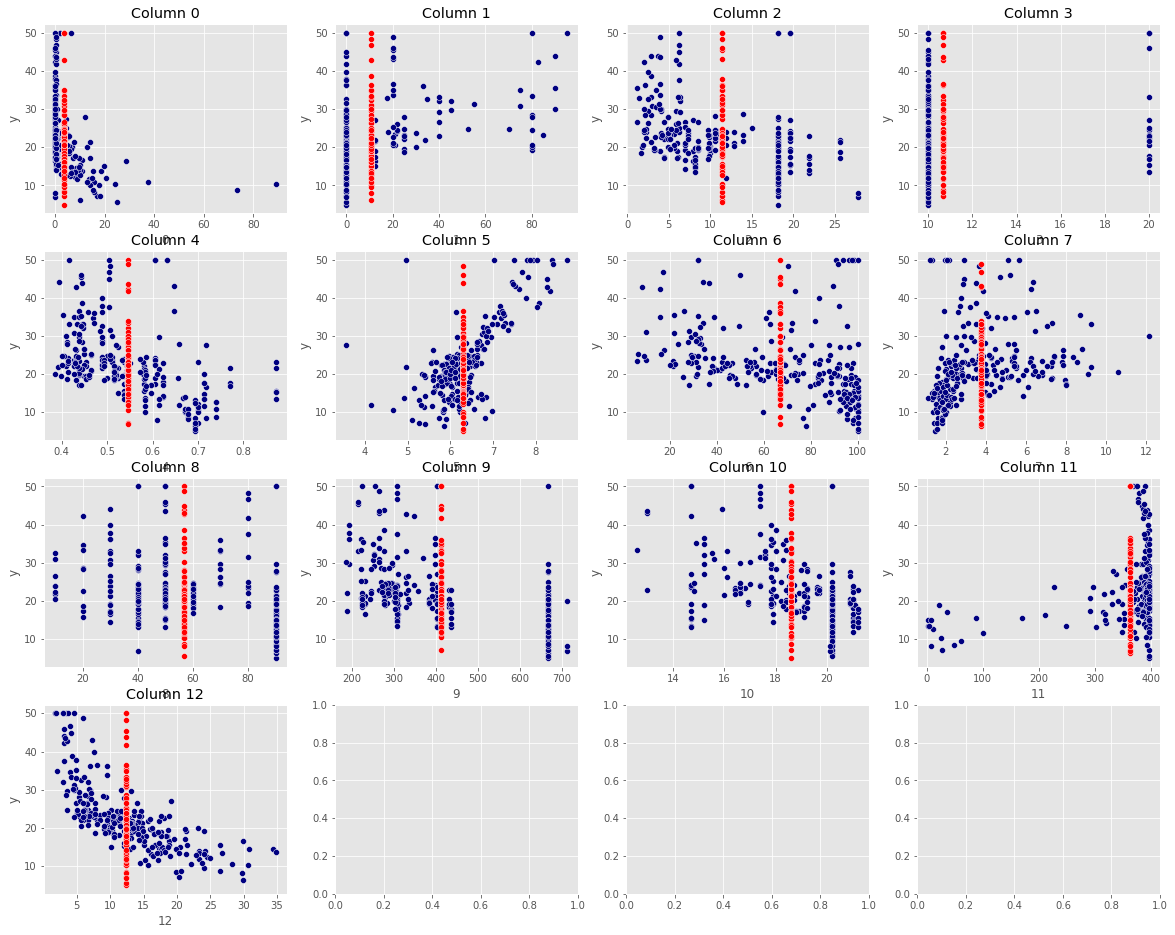

In [689]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 16))
df = train_meanfill['data3']
df_na = train_data['data3'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 4

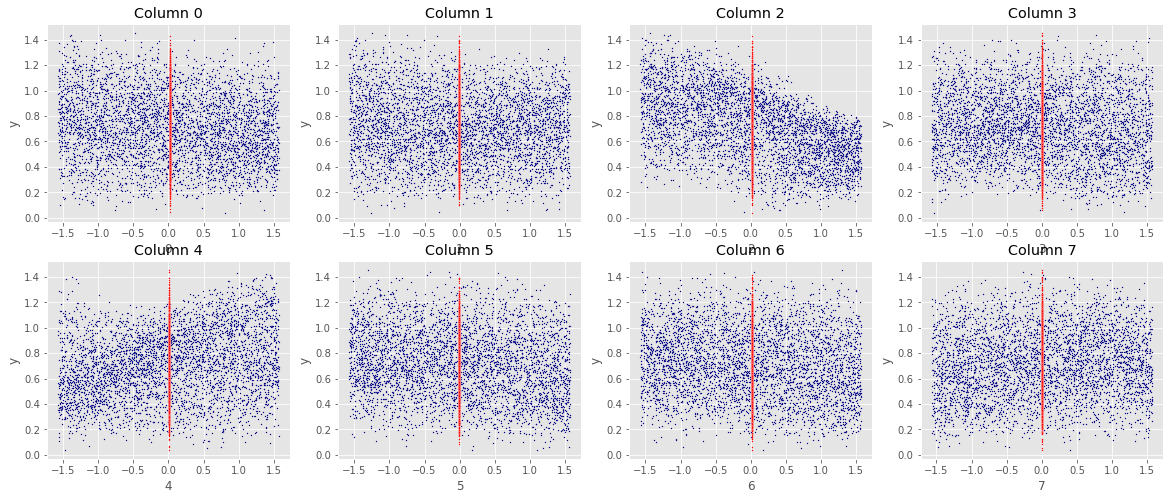

In [690]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_meanfill['data4']
df_na = train_data['data4'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy", s=2)
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red", s=2)
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 5

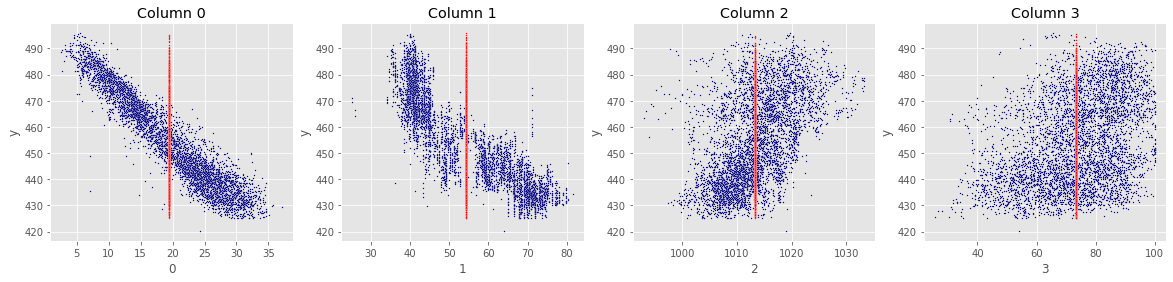

In [691]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 4))
df = train_meanfill['data5']
df_na = train_data['data5'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i%4], color="navy", s=2)
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i%4], color="red", s=2)
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 6

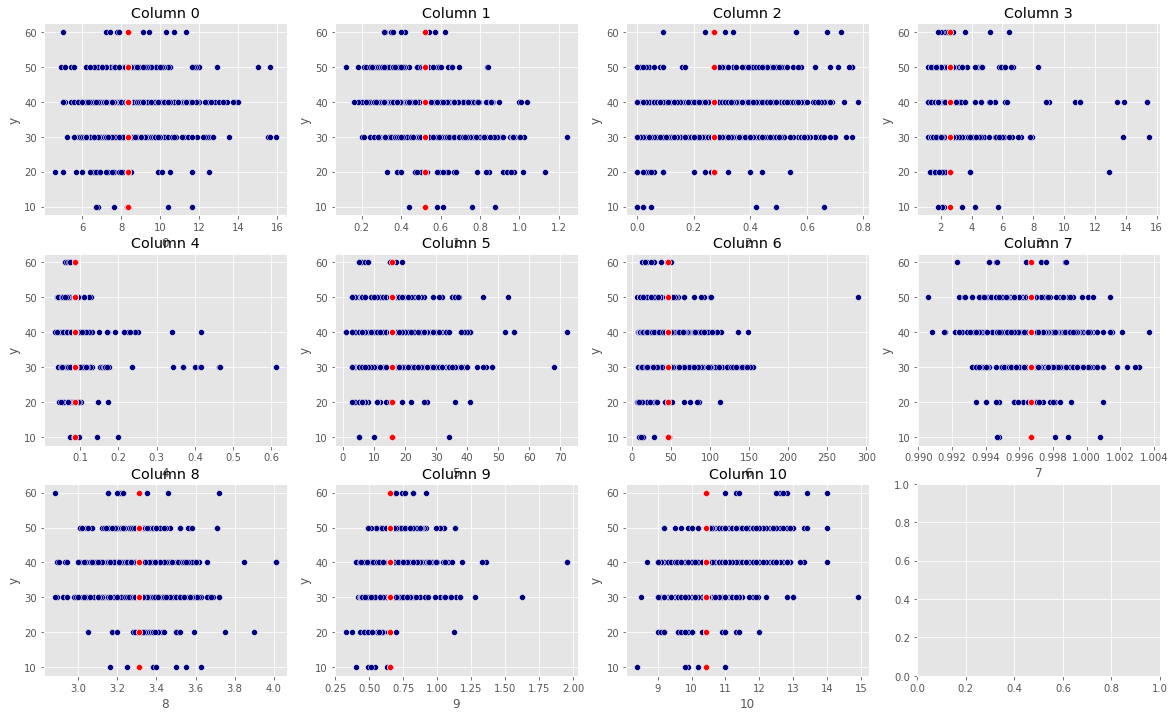

In [692]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20, 12))
df = train_meanfill['data6']
df_na = train_data['data6'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 7

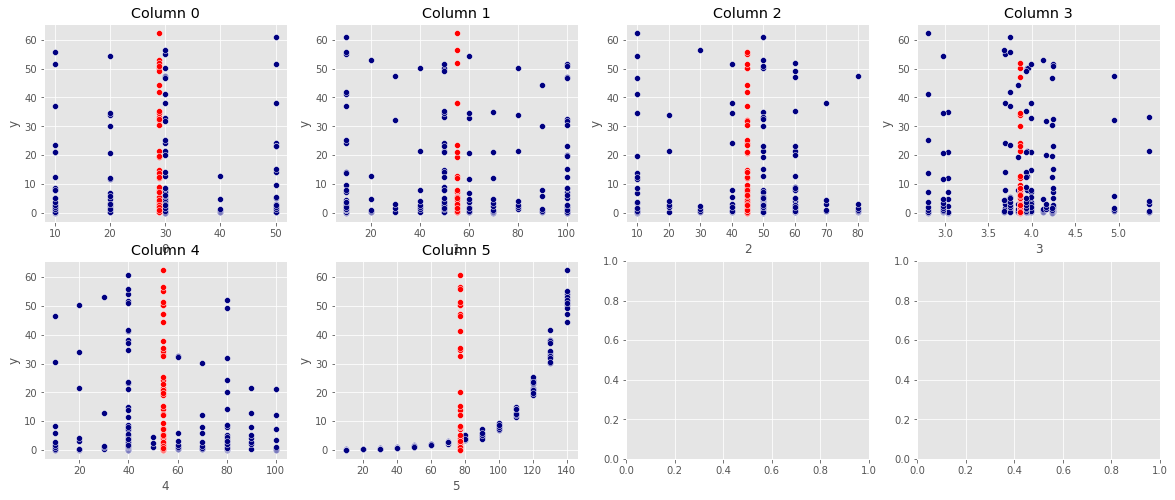

In [693]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_meanfill['data7']
df_na = train_data['data7'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

# Fill The Missing Value -- KNN (k=3)

In [694]:
from sklearn.impute import KNNImputer
imputer_knn   = KNNImputer(n_neighbors=3, weights='distance')

train_knnfill, test_knnfill = {}, {}
for i in range(1, 8):
    df_X = train_data["data{}".format(i)].iloc[:, :-1]
    df_y = train_data["data{}".format(i)].iloc[:, -1]
    df_impute = pd.DataFrame(imputer_knn.fit_transform(df_X))
    train_knnfill["data{}".format(i)] = pd.concat([df_impute, df_y], axis=1)
    
    df_X = test_data["data{}".format(i)].iloc[:, :-1]
    df_y = test_data["data{}".format(i)].iloc[:, -1]
    df_impute = pd.DataFrame(imputer_knn.fit_transform(df_X))
    test_knnfill["data{}".format(i)] = pd.concat([df_impute, df_y], axis=1)

## Data 1

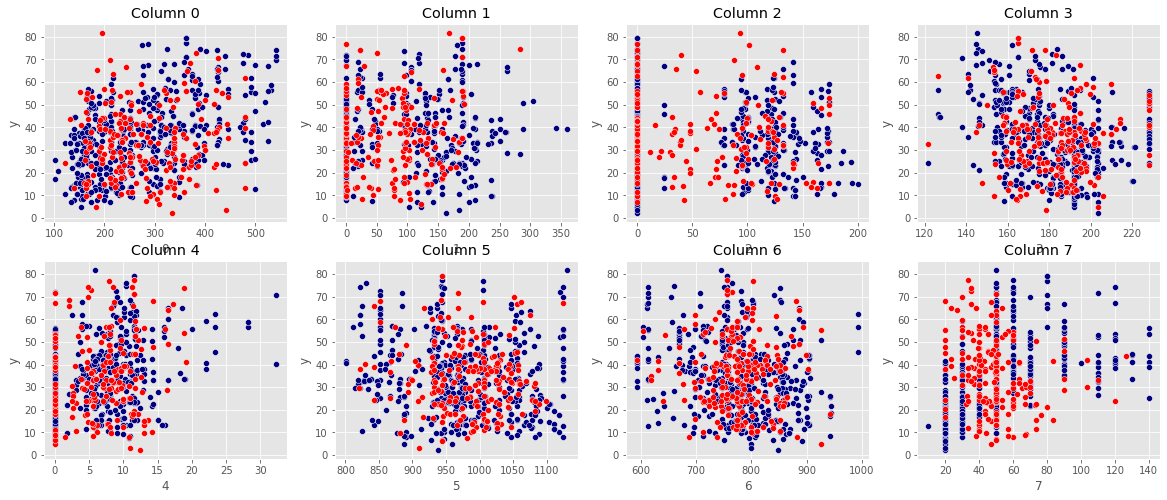

In [695]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_knnfill['data1']
df_na = train_data['data1'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 2

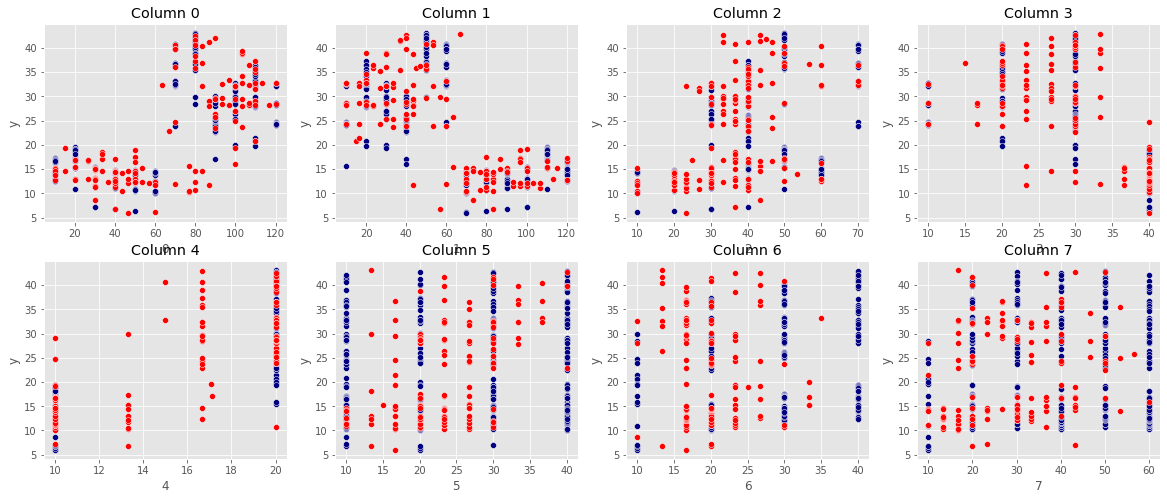

In [696]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_knnfill['data2']
df_na = train_data['data2'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 3

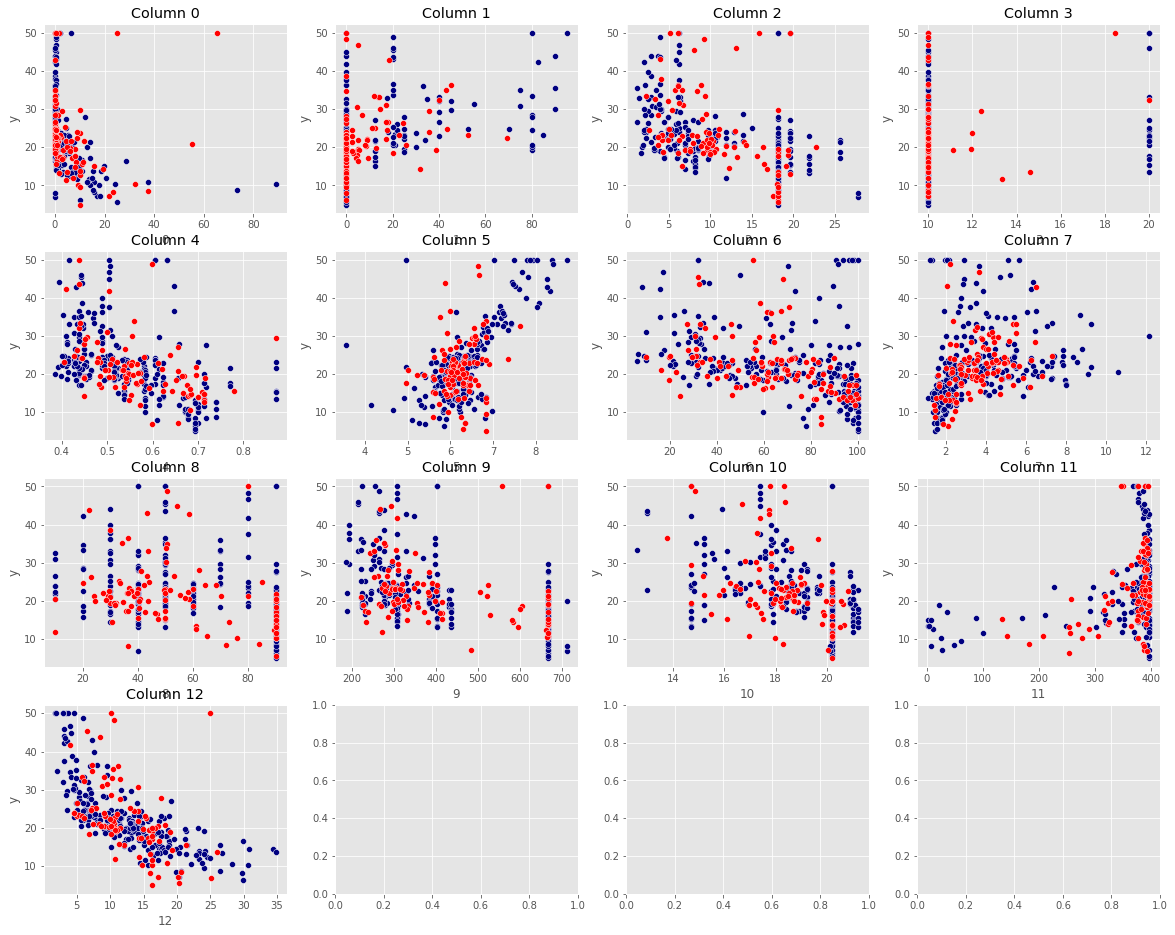

In [697]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 16))
df = train_knnfill['data3']
df_na = train_data['data3'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 4

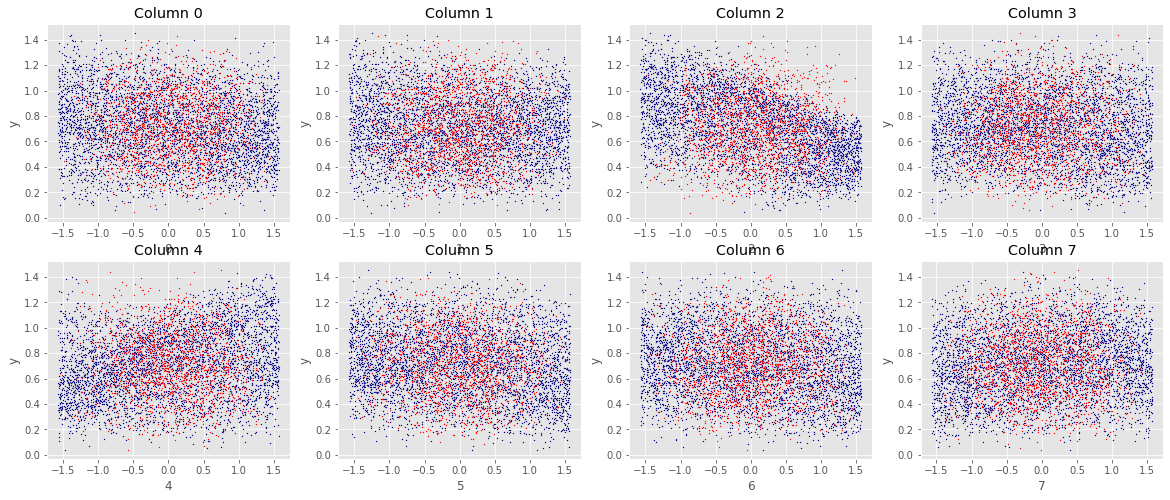

In [698]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_knnfill['data4']
df_na = train_data['data4'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy", s=2)
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red", s=2)
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 5

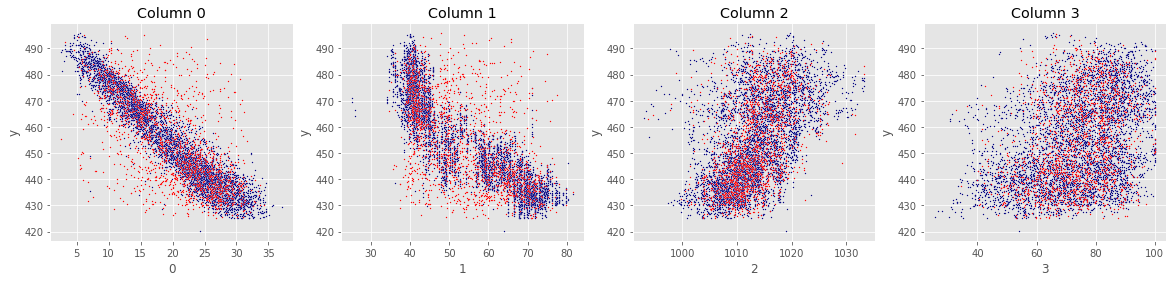

In [699]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 4))
df = train_knnfill['data5']
df_na = train_data['data5'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i%4], color="navy", s=2)
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i%4], color="red", s=2)
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 6

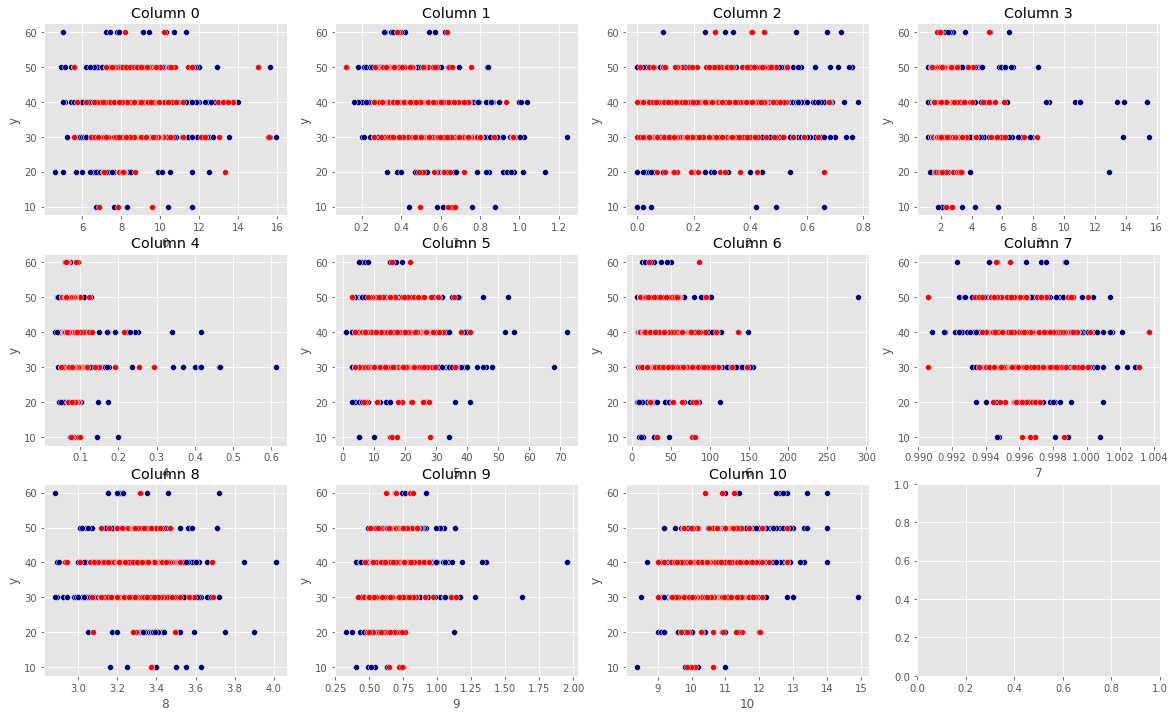

In [700]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20, 12))
df = train_knnfill['data6']
df_na = train_data['data6'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 7

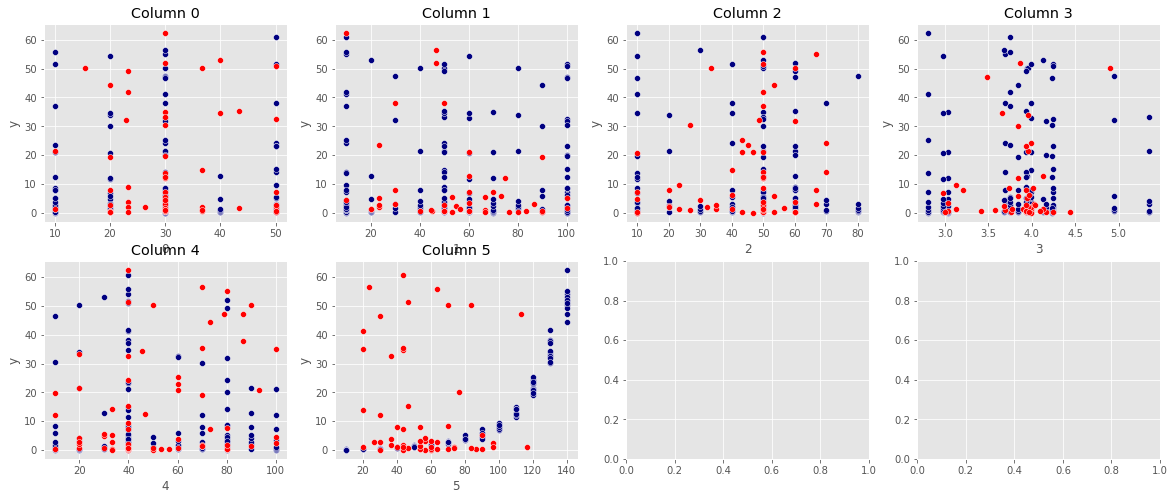

In [701]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_knnfill['data7']
df_na = train_data['data7'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

# Fill The Missing Value -- KNN (k=15)

In [718]:
from sklearn.impute import KNNImputer
imputer_knn   = KNNImputer(n_neighbors=5, weights='uniform')

train_knnfill_2, test_knnfill_2 = {}, {}
for i in range(1, 8):
    df_X = train_data["data{}".format(i)].iloc[:, :-1]
    df_y = train_data["data{}".format(i)].iloc[:, -1]
    df_impute = pd.DataFrame(imputer_knn.fit_transform(df_X))
    train_knnfill_2["data{}".format(i)] = pd.concat([df_impute, df_y], axis=1)
    
    df_X = test_data["data{}".format(i)].iloc[:, :-1]
    df_y = test_data["data{}".format(i)].iloc[:, -1]
    df_impute = pd.DataFrame(imputer_knn.fit_transform(df_X))
    test_knnfill_2["data{}".format(i)] = pd.concat([df_impute, df_y], axis=1)

## Data 1

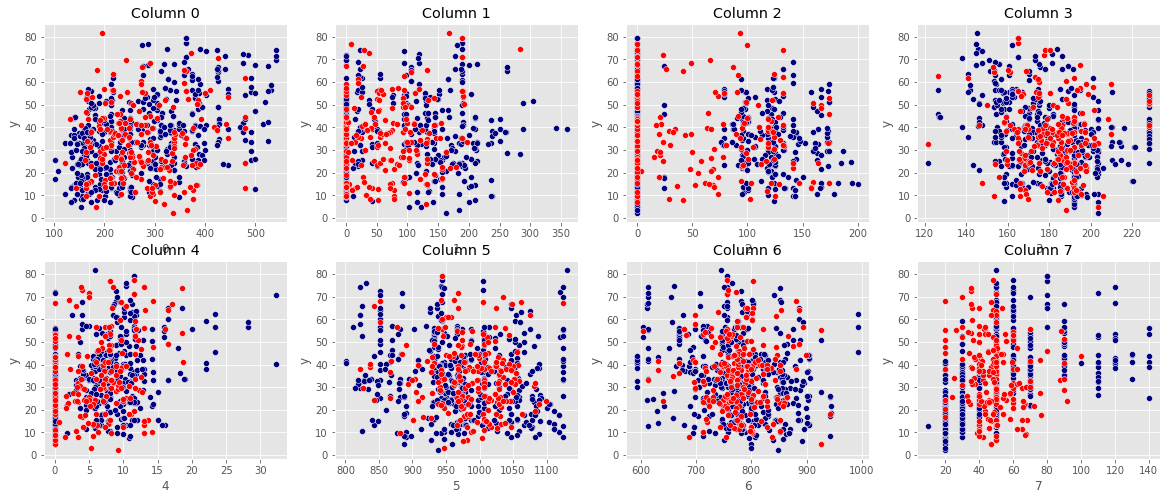

In [719]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_knnfill_2['data1']
df_na = train_data['data1'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 2

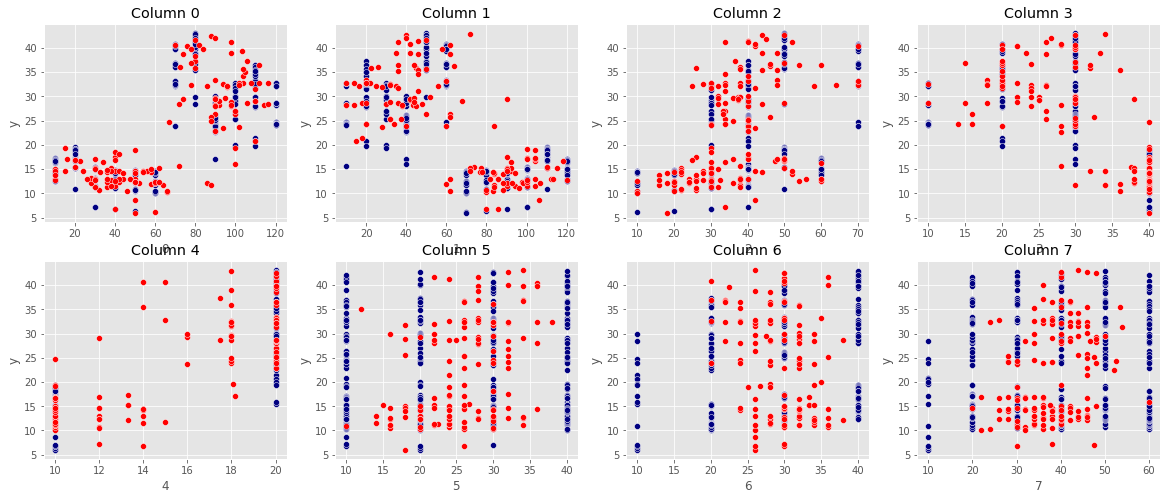

In [720]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_knnfill_2['data2']
df_na = train_data['data2'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 3

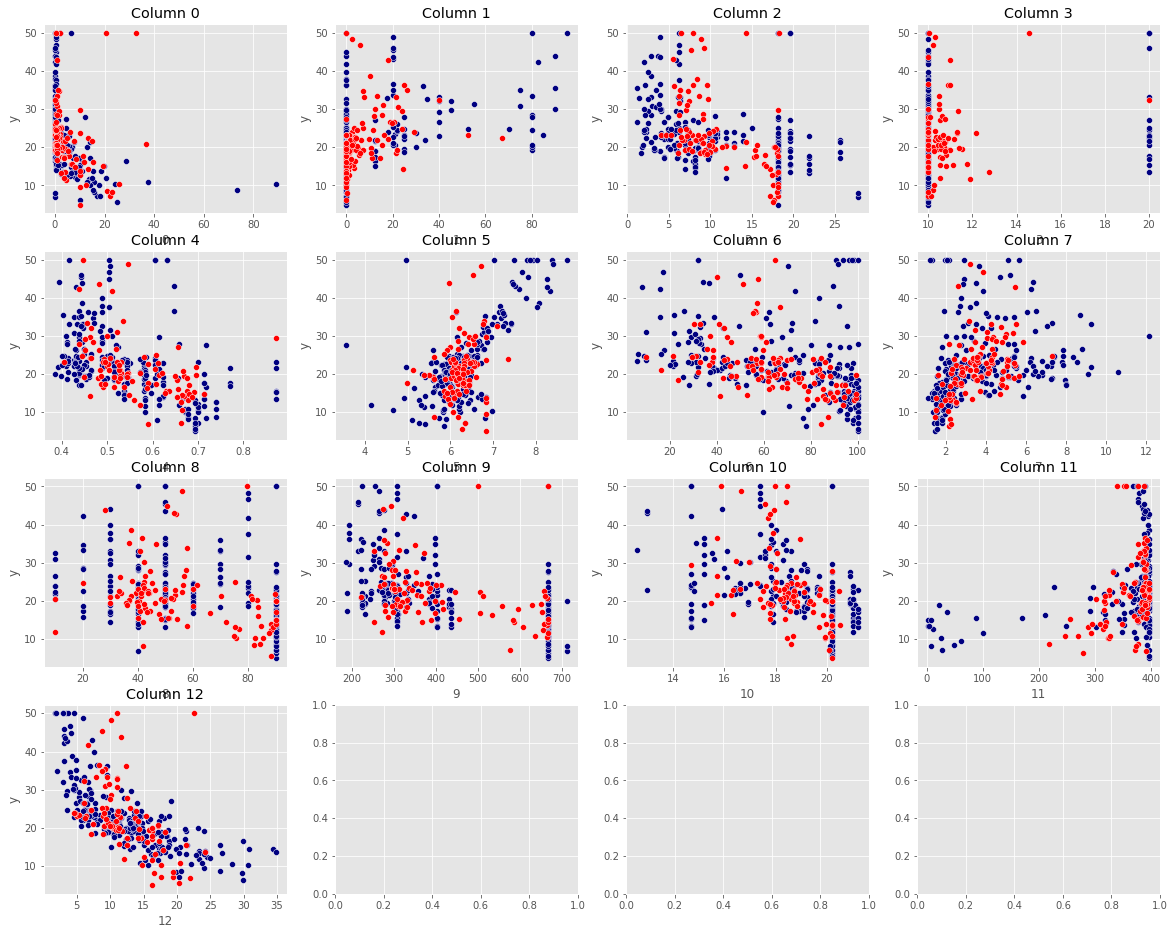

In [705]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 16))
df = train_knnfill_2['data3']
df_na = train_data['data3'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 4

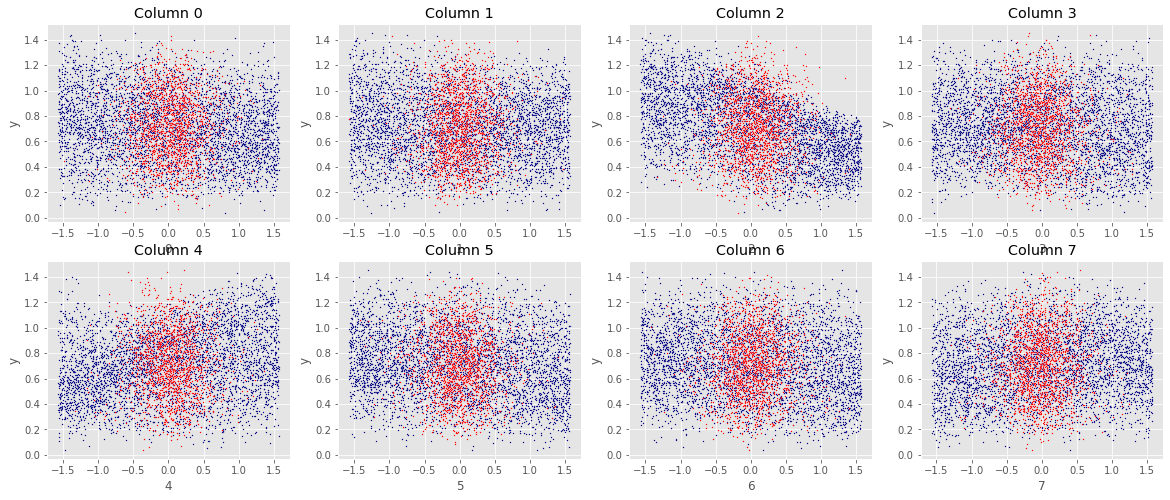

In [706]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_knnfill_2['data4']
df_na = train_data['data4'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy", s=2)
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red", s=2)
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 5

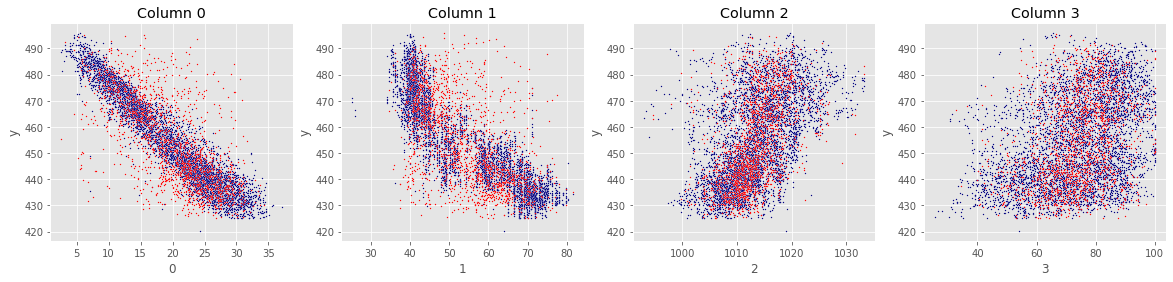

In [707]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 4))
df = train_knnfill_2['data5']
df_na = train_data['data5'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i%4], color="navy", s=2)
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i%4], color="red", s=2)
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 6

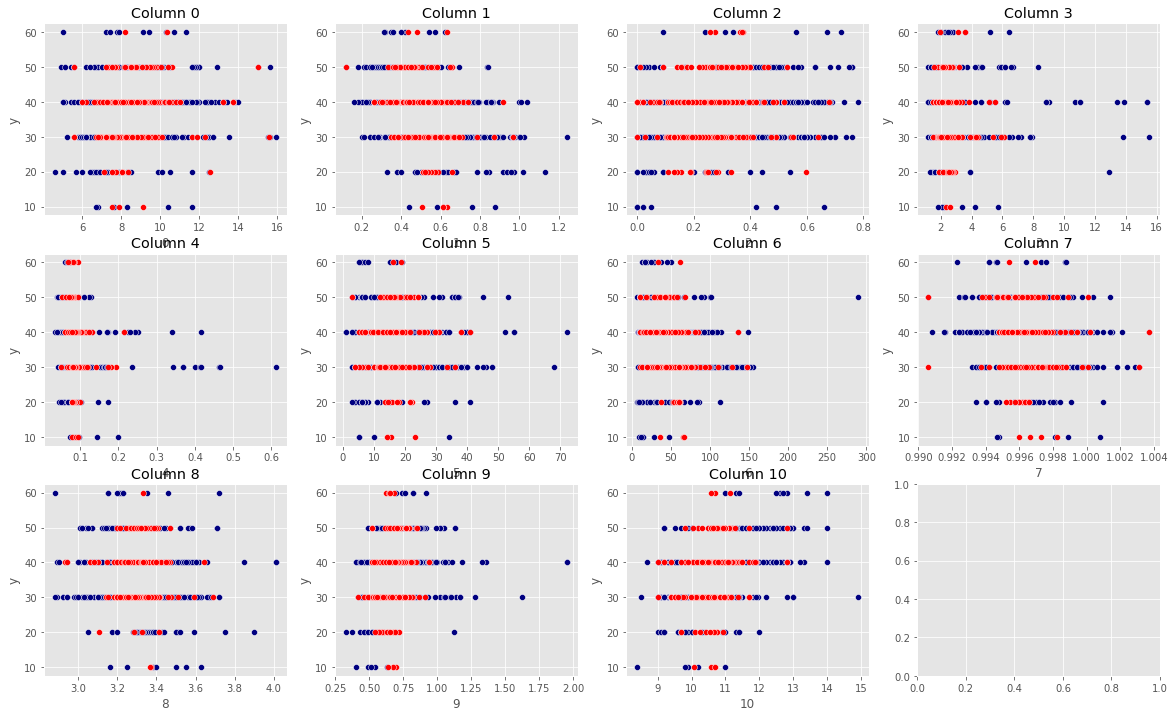

In [708]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20, 12))
df = train_knnfill_2['data6']
df_na = train_data['data6'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 7

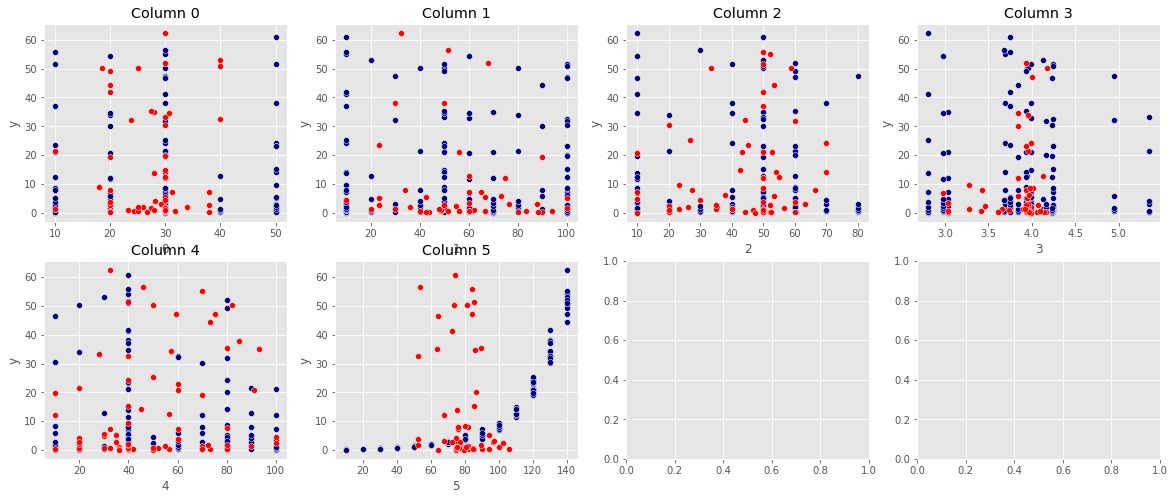

In [709]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_knnfill_2['data7']
df_na = train_data['data7'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

# Fill The Missing Value -- IterativeImputer

In [710]:
from sklearn.impute import IterativeImputer
imputer_II   = IterativeImputer(random_state=0, initial_strategy='most_frequent',
                                max_iter=1000)

train_IIfill, test_IIfill = {}, {}
for i in range(1, 8):
    df_X = train_data["data{}".format(i)].iloc[:, :-1]
    df_y = train_data["data{}".format(i)].iloc[:, -1]
    df_impute = pd.DataFrame(imputer_II.fit_transform(df_X))
    train_IIfill["data{}".format(i)] = pd.concat([df_impute, df_y], axis=1)
    
    df_X = test_data["data{}".format(i)].iloc[:, :-1]
    df_y = test_data["data{}".format(i)].iloc[:, -1]
    df_impute = pd.DataFrame(imputer_II.fit_transform(df_X))
    test_IIfill["data{}".format(i)] = pd.concat([df_impute, df_y], axis=1)

## Data 1

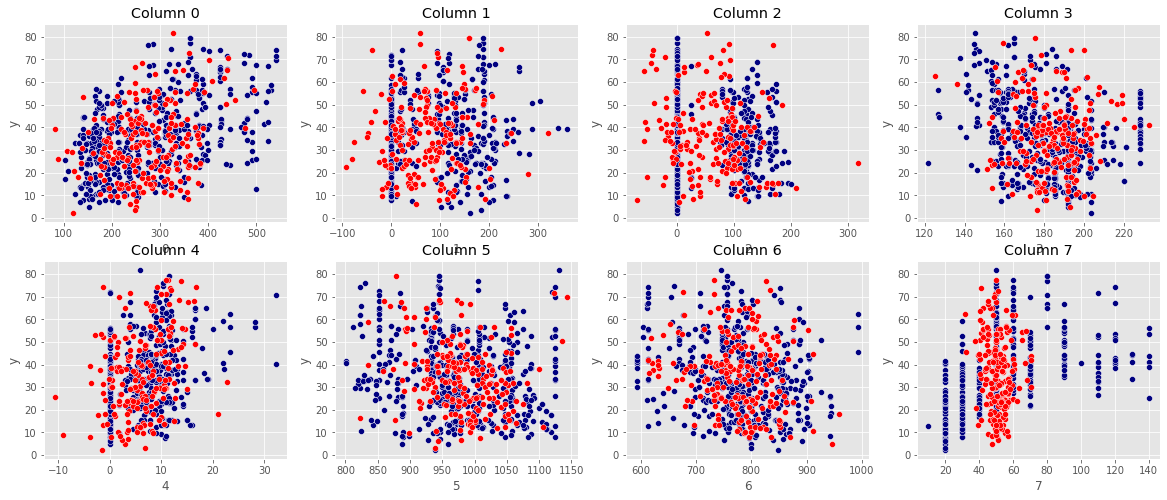

In [711]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_IIfill['data1']
df_na = train_data['data1'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 2

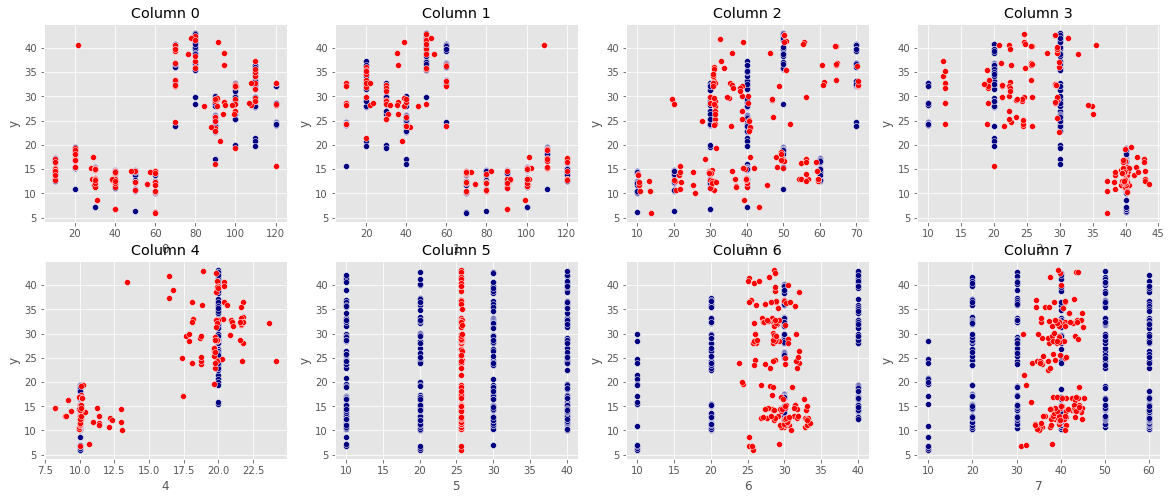

In [712]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_IIfill['data2']
df_na = train_data['data2'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 3

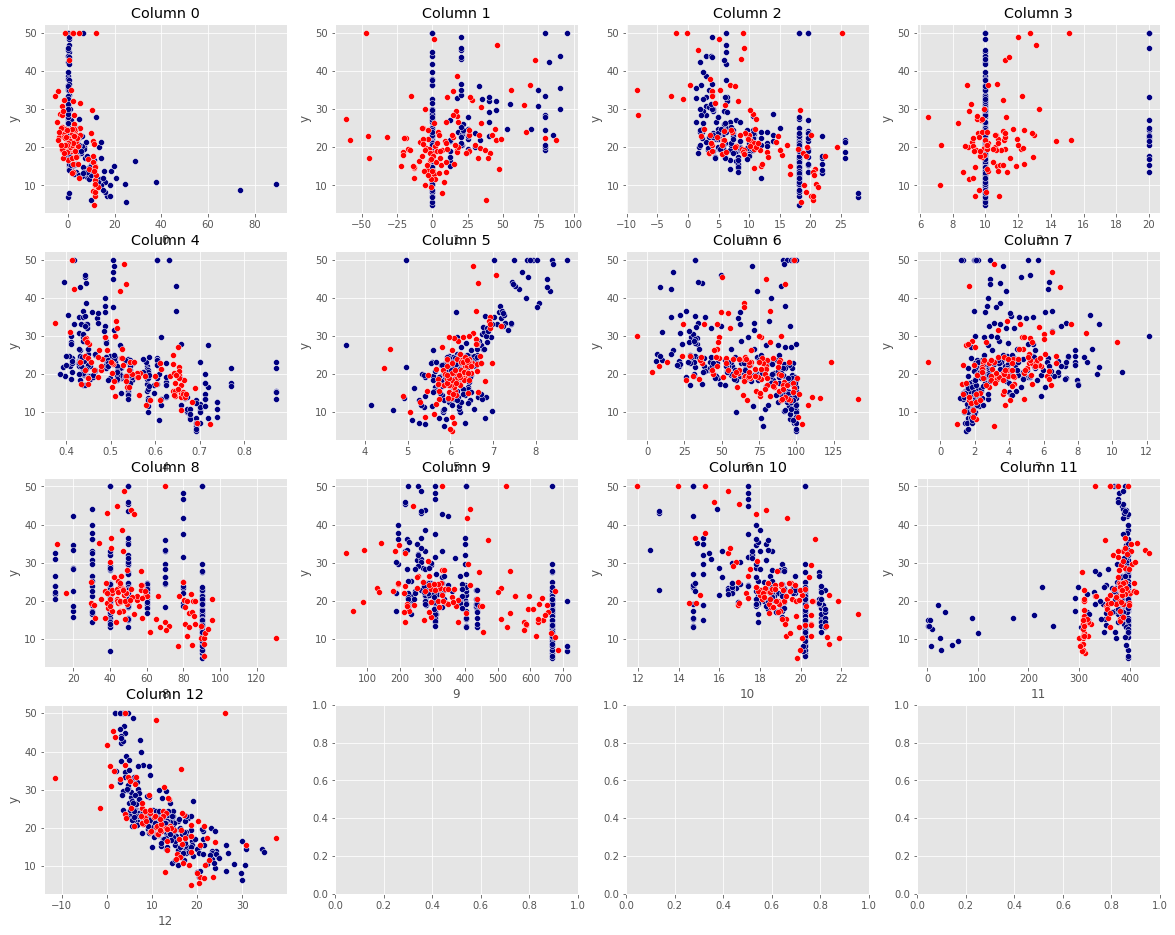

In [713]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 16))
df = train_IIfill['data3']
df_na = train_data['data3'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 4

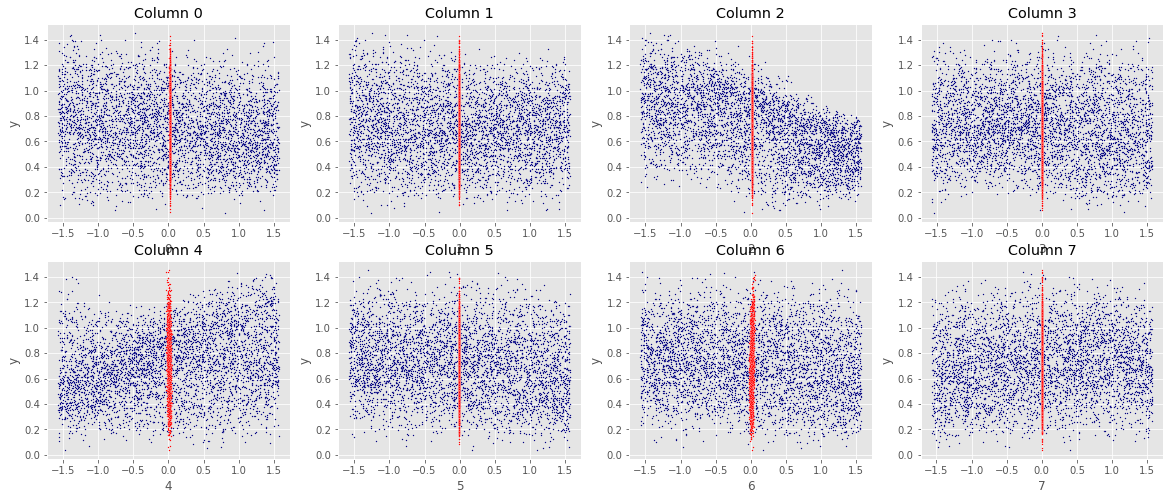

In [714]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_IIfill['data4']
df_na = train_data['data4'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy", s=2)
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red", s=2)
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 5

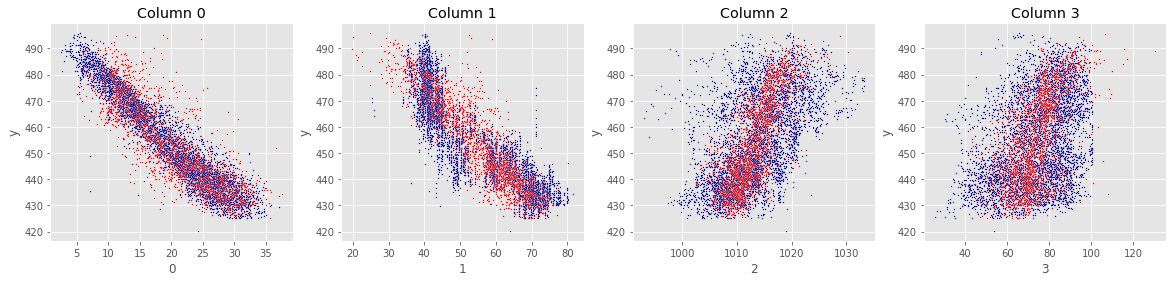

In [715]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 4))
df = train_IIfill['data5']
df_na = train_data['data5'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i%4], color="navy", s=2)
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i%4], color="red", s=2)
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 6

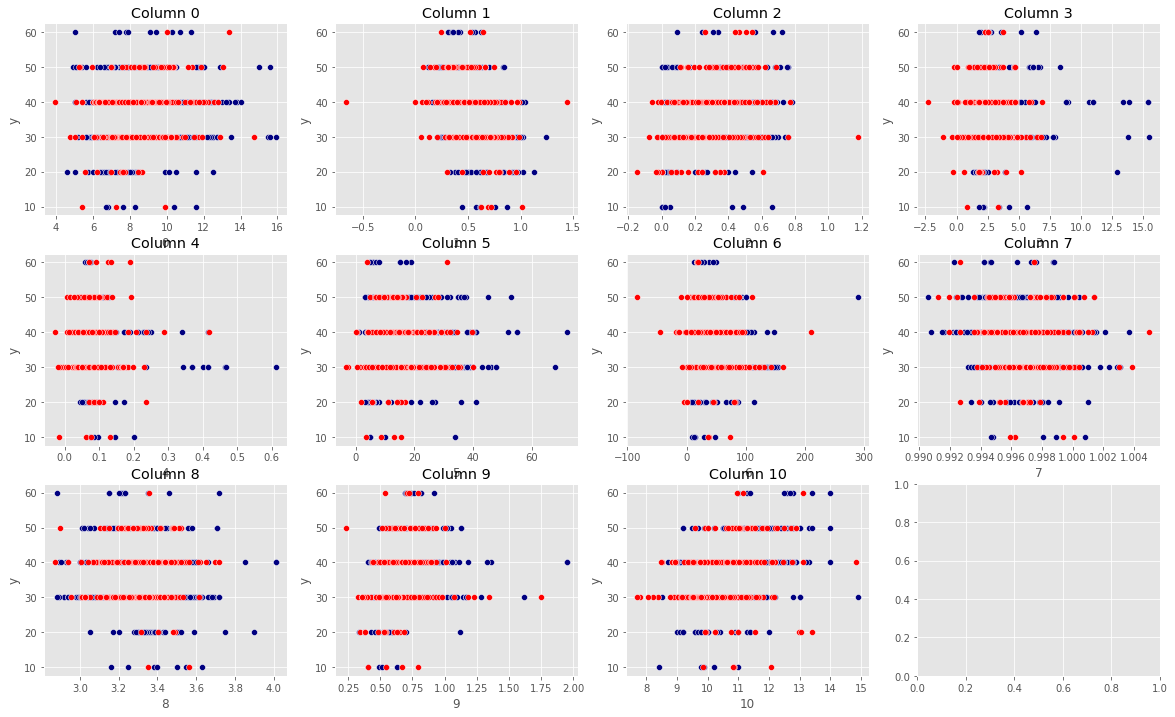

In [716]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20, 12))
df = train_IIfill['data6']
df_na = train_data['data6'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 7

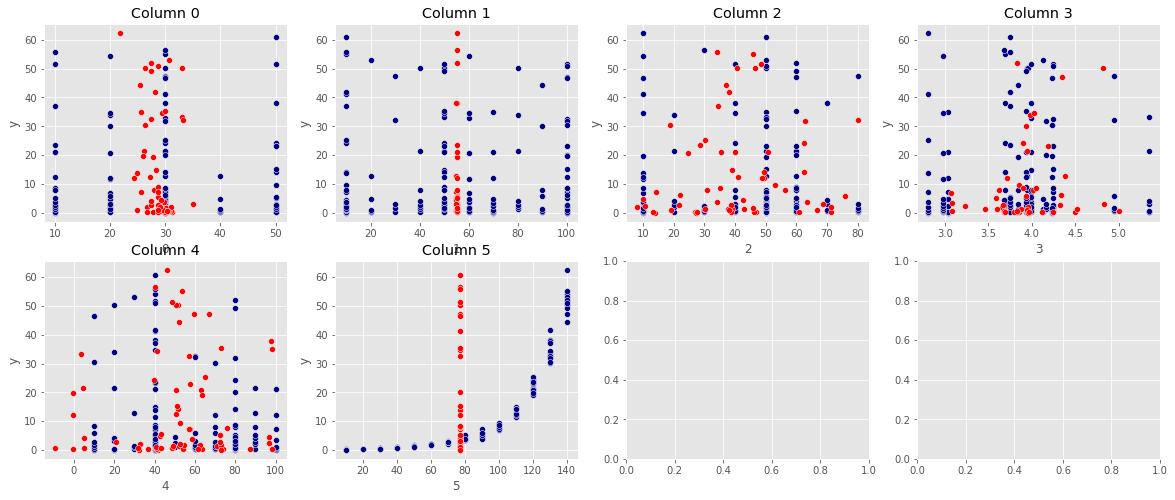

In [717]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_IIfill['data7']
df_na = train_data['data7'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

# Fill The Missing Value -- IterativeImputer with tree

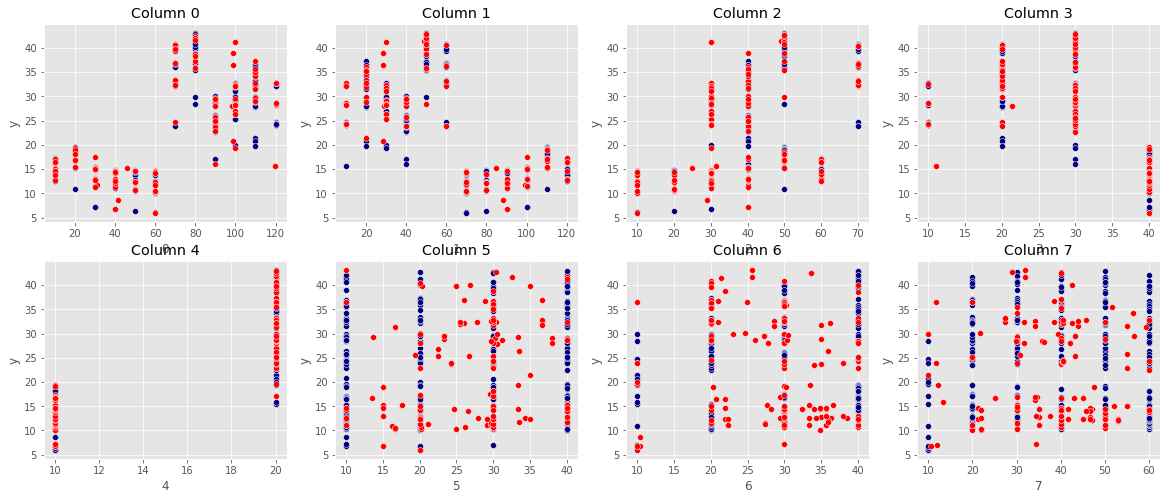

In [727]:
# 放著看
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_RFfill['data2']
df_na = train_data['data2'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

In [755]:
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=0),
    ExtraTreesRegressor(n_estimators=10, random_state=0),
    KNeighborsRegressor(n_neighbors=15)
]

# Estimate the score after iterative imputation of the missing values with different estimators
imputer_Bayes = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=100, random_state=0), 
                                 random_state=0, max_iter=100)

train_RFfill, test_RFfill = {}, {}
for i in range(1, 8):
    print(i)
    df_X = train_data["data{}".format(i)].iloc[:, :-1]
    df_y = train_data["data{}".format(i)].iloc[:, -1]
    df_impute = pd.DataFrame(imputer_Bayes.fit_transform(df_X))
    train_RFfill["data{}".format(i)] = pd.concat([df_impute, df_y], axis=1)
    
    #df_X = test_data["data{}".format(i)].iloc[:, :-1]
    #df_y = test_data["data{}".format(i)].iloc[:, -1]
    #df_impute = pd.DataFrame(imputer_Bayes.fit_transform(df_X))
    #test_RFfill["data{}".format(i)] = pd.concat([df_impute, df_y], axis=1)

1


C:\Users\Rou_yi\AppData\Roaming\Python\Python38\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


2


C:\Users\Rou_yi\AppData\Roaming\Python\Python38\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


3


C:\Users\Rou_yi\AppData\Roaming\Python\Python38\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


4


KeyboardInterrupt: 

## Data 1

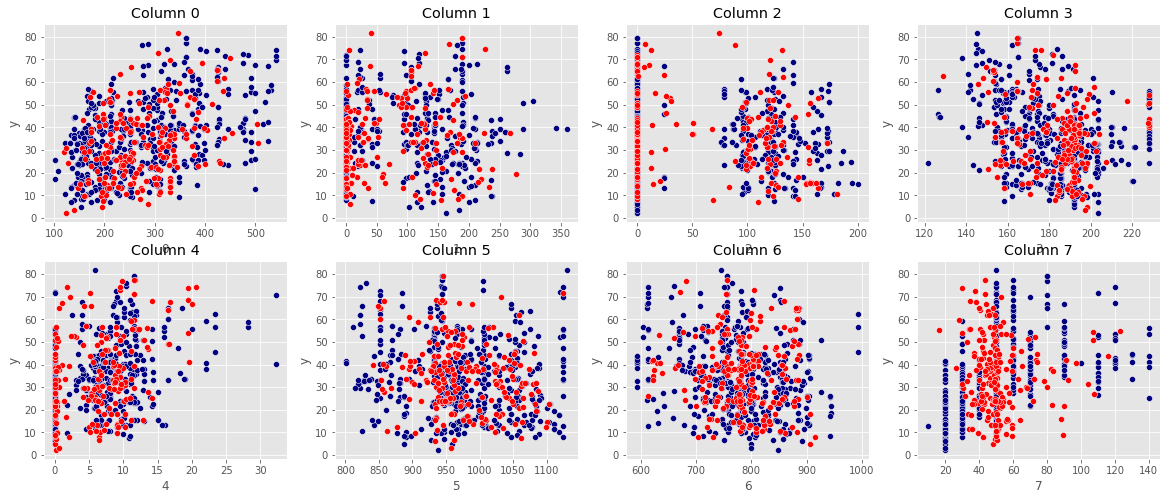

In [756]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_RFfill['data1']
df_na = train_data['data1'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 2

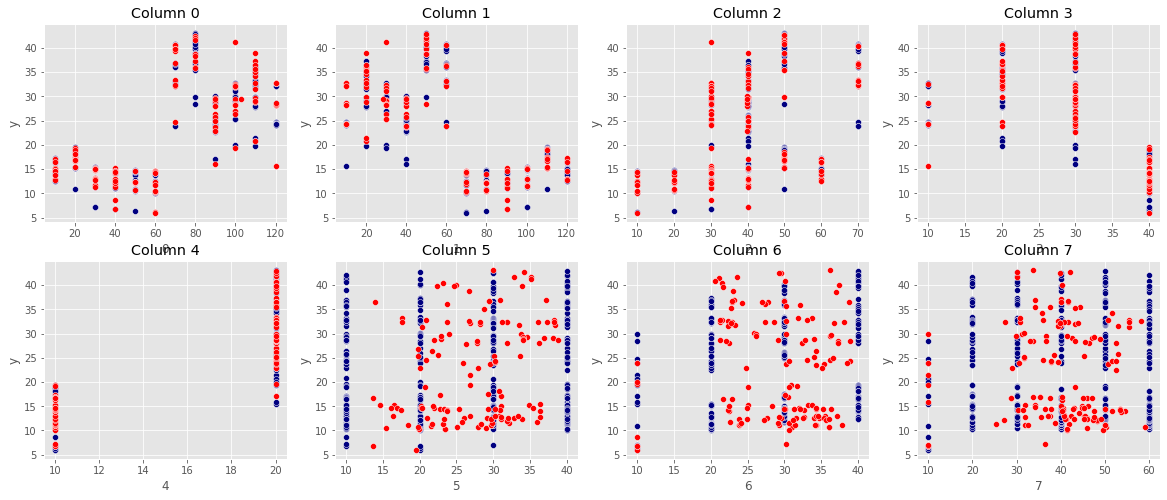

In [757]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_RFfill['data2']
df_na = train_data['data2'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 3

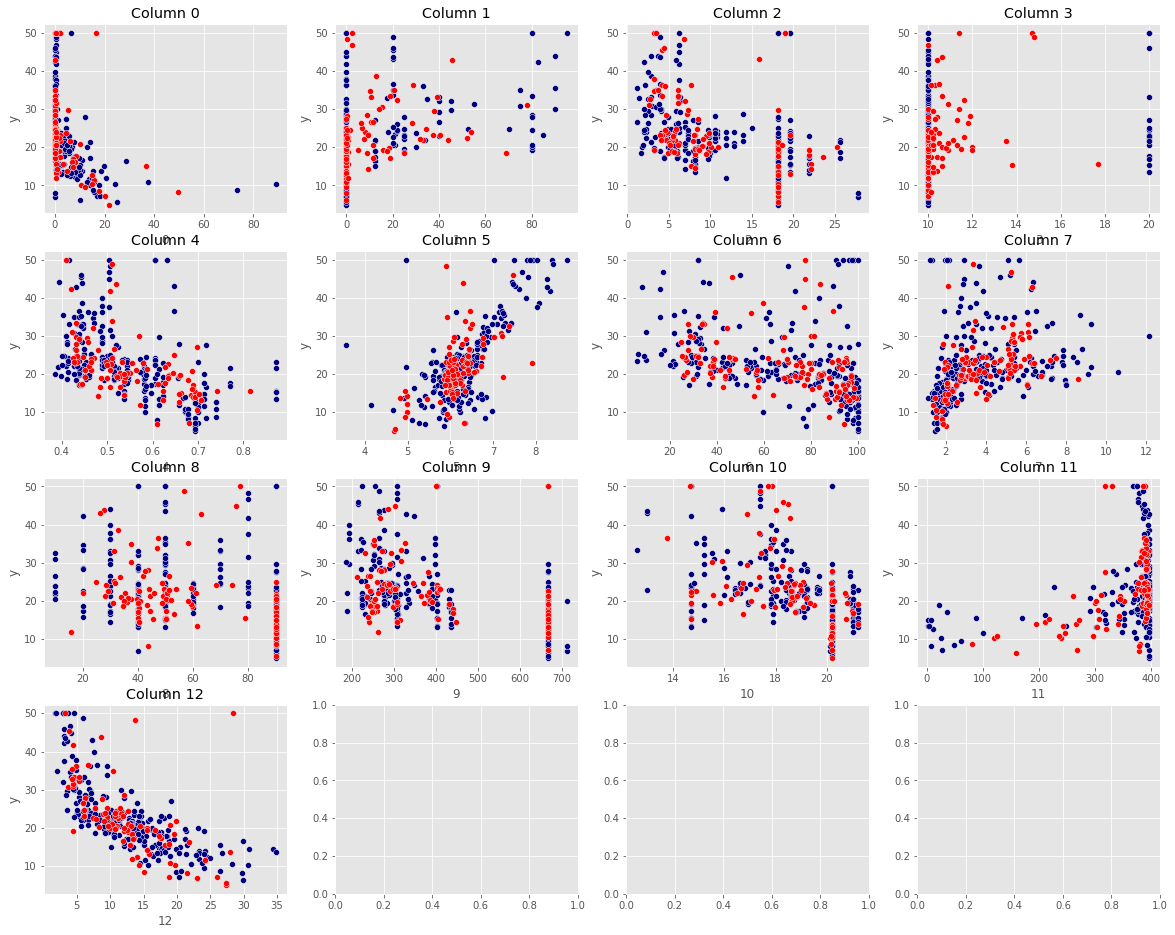

In [758]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 16))
df = train_RFfill['data3']
df_na = train_data['data3'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 4

KeyError: 'data4'

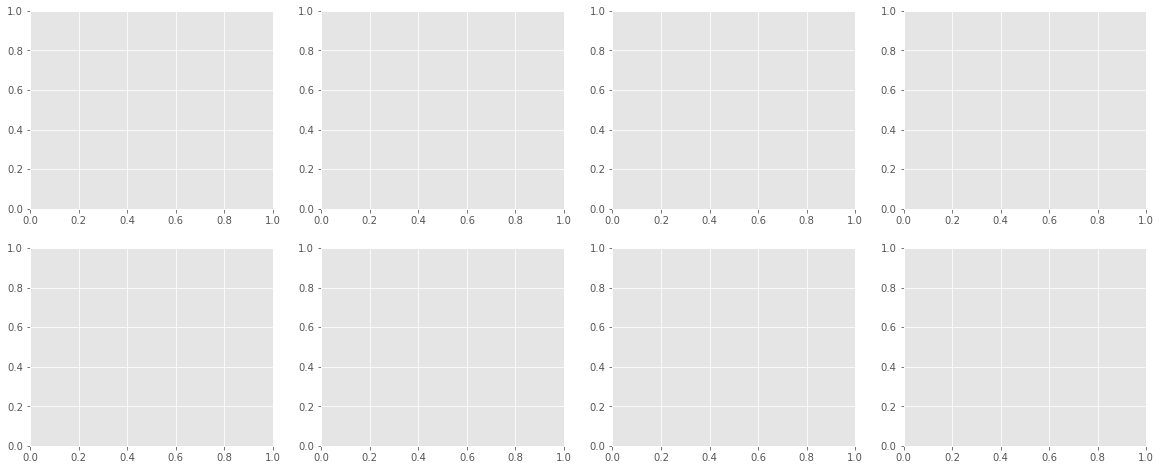

In [759]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_RFfill['data4']
df_na = train_data['data4'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy", s=2)
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red", s=2)
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 5

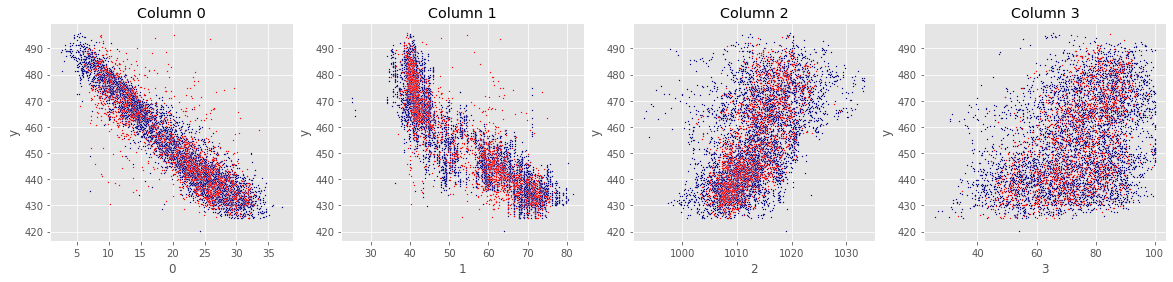

In [733]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 4))
df = train_RFfill['data5']
df_na = train_data['data5'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i%4], color="navy", s=2)
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i%4], color="red", s=2)
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 6

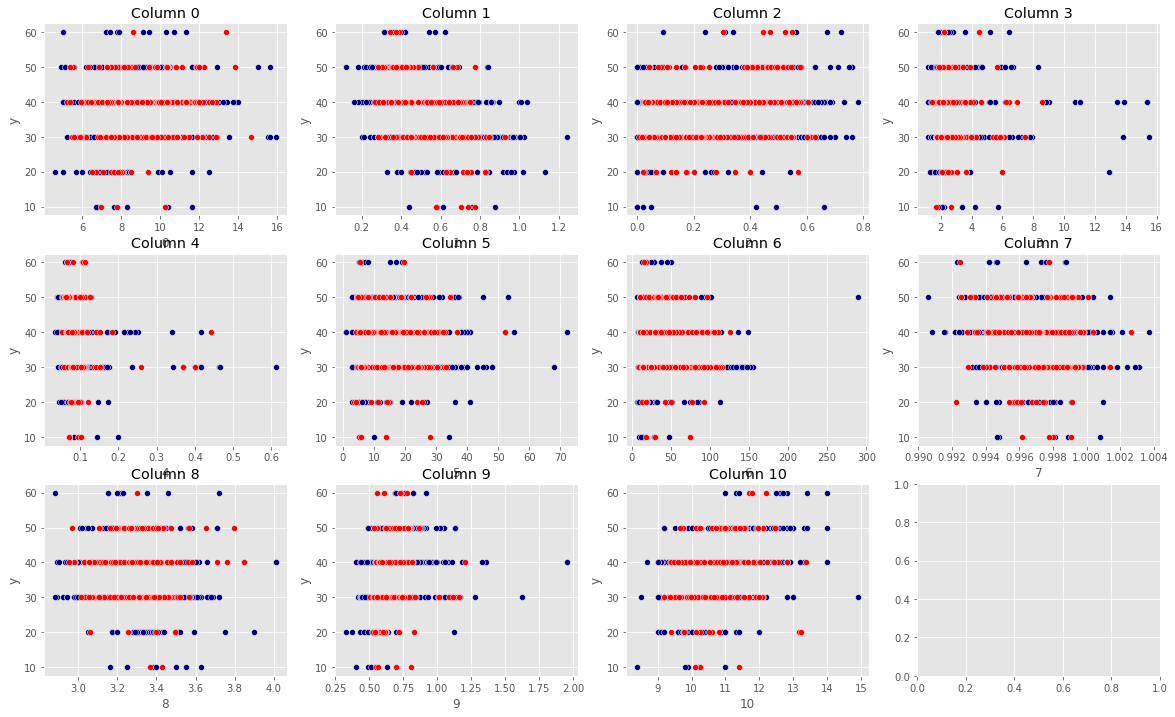

In [734]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20, 12))
df = train_RFfill['data6']
df_na = train_data['data6'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 7

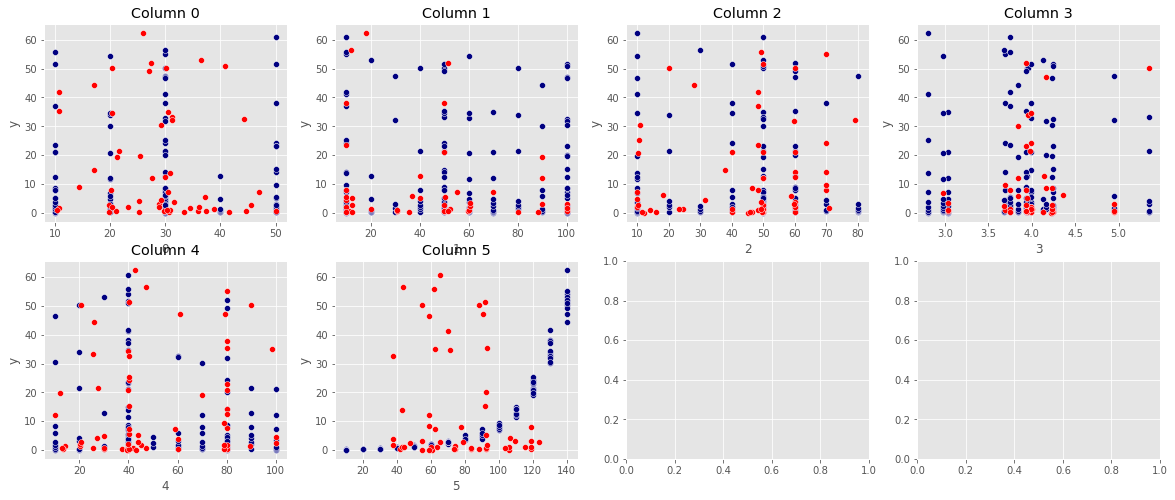

In [735]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_RFfill['data7']
df_na = train_data['data7'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

**使用隨機森林回歸進行填補**  
建立在回歸演算法認為特徵和標籤之間存在著某種關係  
利用標籤 + 其他特徵反推缺失值  
此種做法對於某一個特徵大量缺失，其他特徵卻很完整的情況非常適用 
  
  
**流程**
1. 先遍歷所有特徵，查看有缺失值的為哪些特徵，並 *從缺失值最少的特徵開始* 進行填補  
  填補缺失值最少的特徵所需要的準確信息最少  
2. 填補其中一個特徵時，先將 *其他特徵缺失值用 0* 代替
3. 劃分測試集及訓練集
4. 建模後預測該特徵的缺失值
5. 將預測值放到原本的特徵矩陣中；重複第 2 步驟

# Fill The Missing Value -- MissingImputer

In [ ]:
from MissingImputer.ModelBasedImputer.MissingImputer import MissingImputer

imputer_MI   = MissingImputer()
train_MIfill, test_MIfill = {}, {}

for i in range(1, 8):
    df_X = train_data["data{}".format(i)].iloc[:, :-1]
    df_y = train_data["data{}".format(i)].iloc[:, -1]
    imputer_MI.fit(df_X)
    df_impute = pd.DataFrame(imputer_MI.transform(df_X))
    train_MIfill["data{}".format(i)] = pd.concat([df_impute, df_y], axis=1)

# Fill The Missing Value -- MissingImputer

In [ ]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

imputer_MI   = MissingImputer()
train_MIfill, test_MIfill = {}, {}

for i in range(1, 8):
    df_X = train_data["data{}".format(i)].iloc[:, :-1]
    df_y = train_data["data{}".format(i)].iloc[:, -1]
    imputer_MI.fit(df_X)
    df_impute = pd.DataFrame(imputer_MI.transform(df_X))
    train_MIfill["data{}".format(i)] = pd.concat([df_impute, df_y], axis=1)

## Data 1

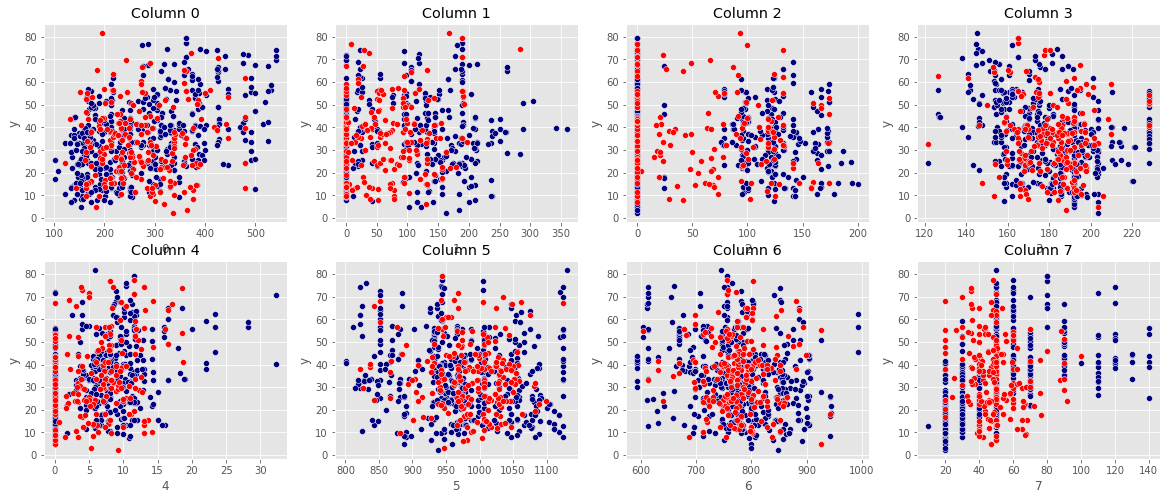

In [719]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_knnfill_2['data1']
df_na = train_data['data1'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 2

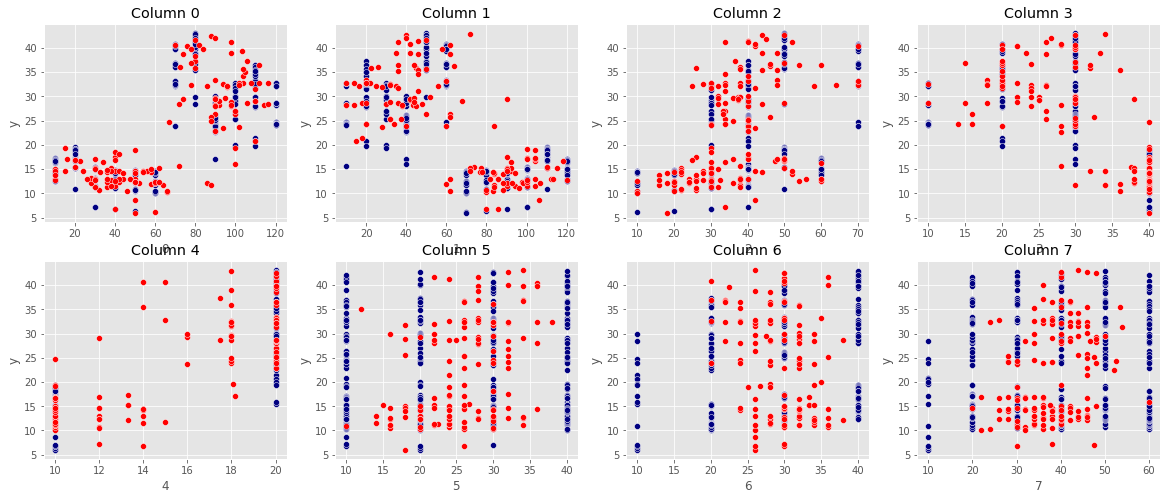

In [720]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_knnfill_2['data2']
df_na = train_data['data2'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 3

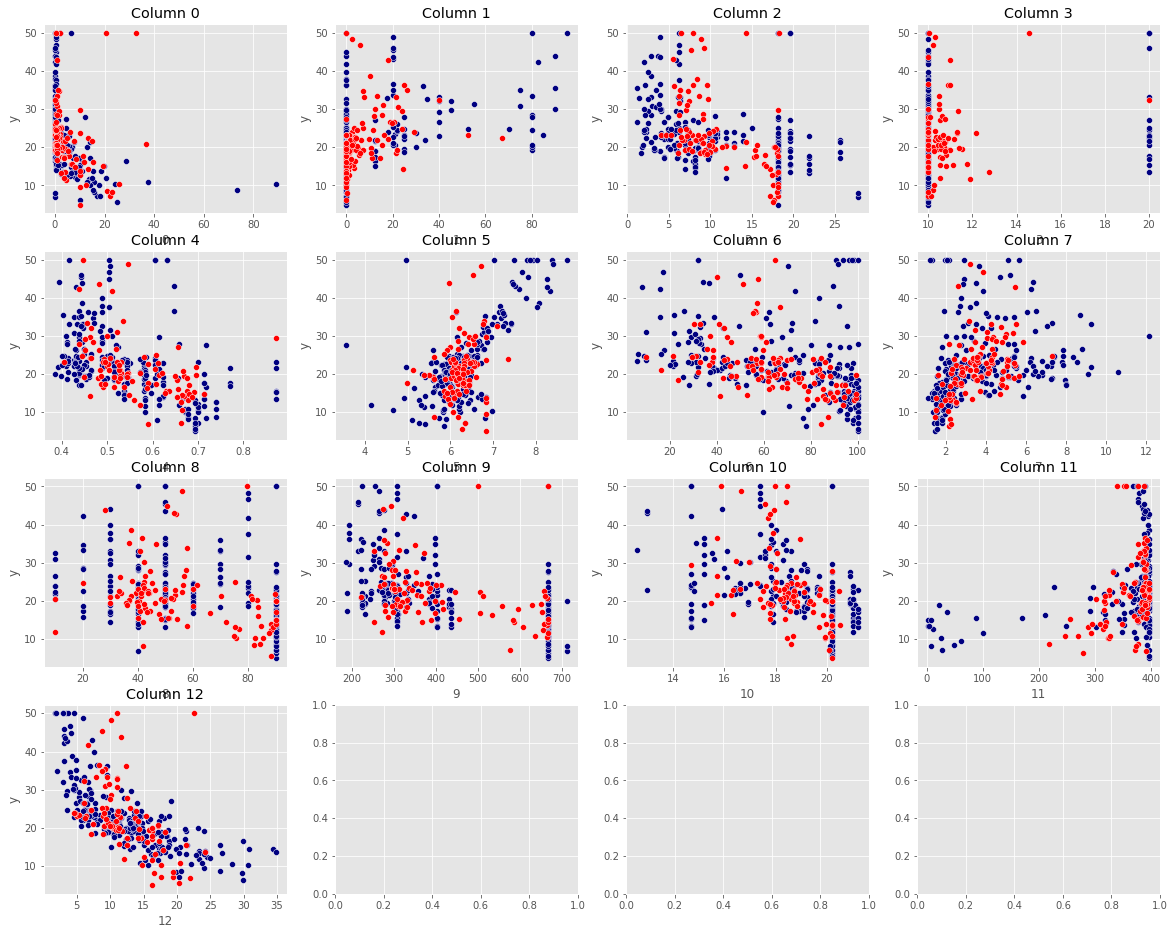

In [705]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 16))
df = train_knnfill_2['data3']
df_na = train_data['data3'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 4

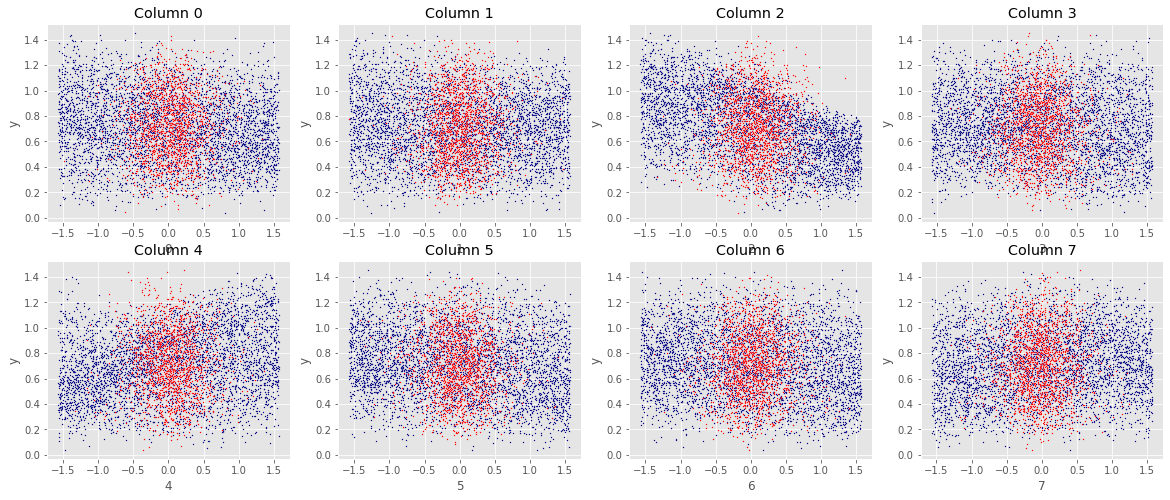

In [706]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_knnfill_2['data4']
df_na = train_data['data4'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy", s=2)
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red", s=2)
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 5

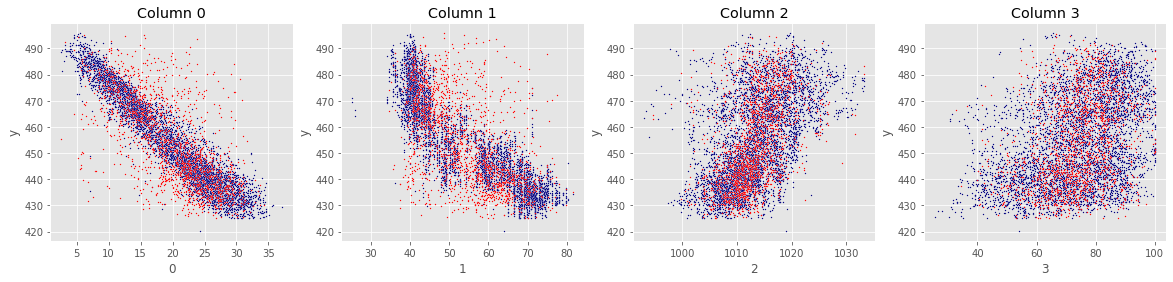

In [707]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 4))
df = train_knnfill_2['data5']
df_na = train_data['data5'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i%4], color="navy", s=2)
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i%4], color="red", s=2)
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 6

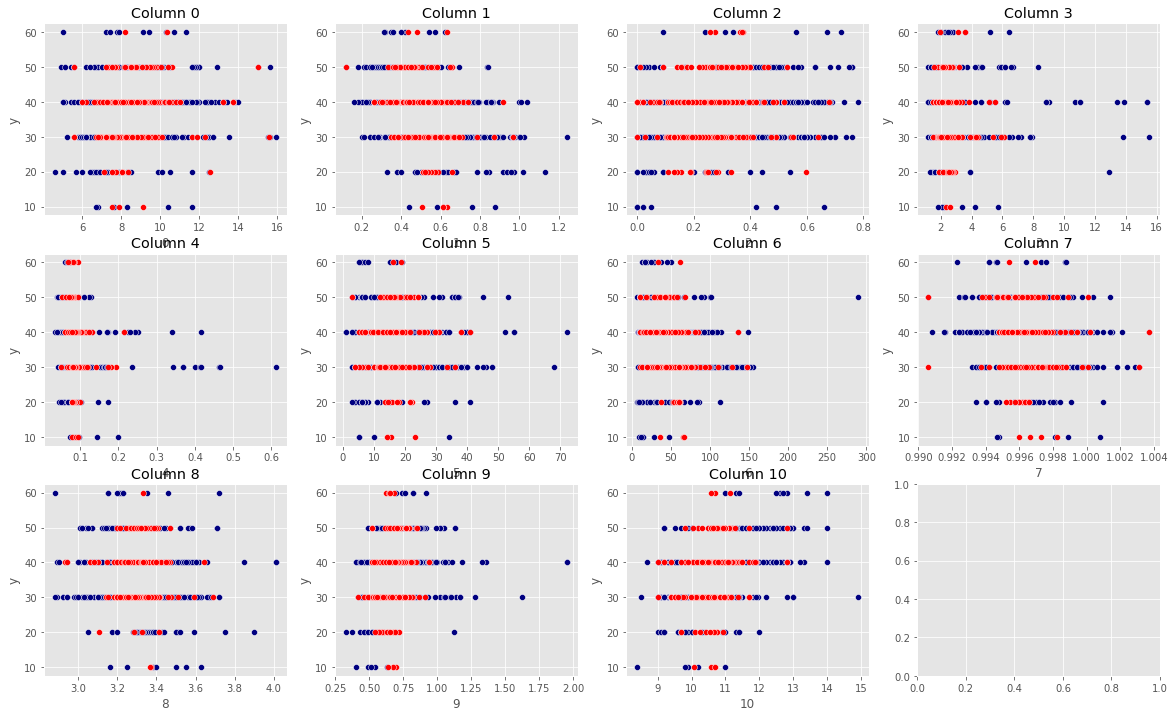

In [708]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20, 12))
df = train_knnfill_2['data6']
df_na = train_data['data6'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## Data 7

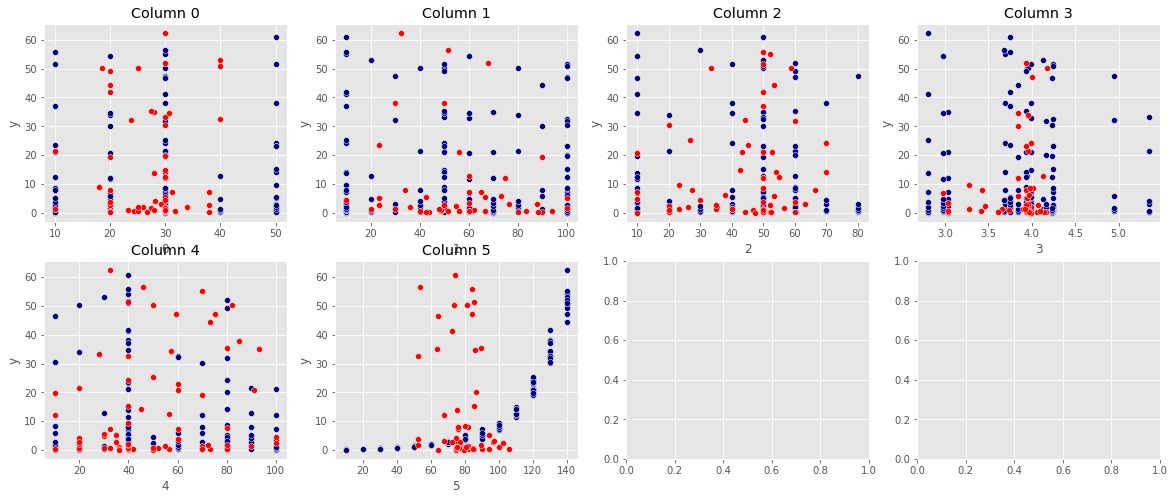

In [709]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_knnfill_2['data7']
df_na = train_data['data7'].isnull()

for i in range(df.shape[1]-1):
    is_na = np.where(df_na.iloc[:, i]==True)
    not_na = np.where(df_na.iloc[:, i]==False)
    ax1 = sns.scatterplot(x=df.loc[not_na, i], y=df.loc[not_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="navy")
    ax1 = sns.scatterplot(x=df.loc[is_na, i], y=df.loc[is_na, df.shape[1]-1], 
                          ax=axes[i//4][i%4], color="red")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")